In [115]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Nlp libraries
from collections import Counter
from string import digits as d, punctuation as p
from nltk.tokenize import word_tokenize as wt
from nltk.stem import WordNetLemmatizer, PorterStemmer as porter
from gensim import corpora
from sklearn.feature_extraction.text import TfidfVectorizer as tf

# library for regular expression operations
import re 
# for string operations
import string
# module for stop words that come with NLTK
from nltk.corpus import stopwords
# module for stemmin
from nltk.stem import PorterStemmer        
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the train csv file
train_data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\maligant train dataset.csv')
train_data.head()

id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

   malignant  highly_malignant  rude  threat  abuse  loathe  
0          0                 0     0       0      0       0  
1          0                 0     0       0      0       0  
2          0                 0     0       0      0       0  
3          0                 0     0       0      0       0  
4          0                 0     0       0      0       0

In [134]:
#importing the test csv file
test_data=pd.read_csv(r'C:\Users\satvi\OneDrive\Desktop\maligant test dataset.csv')
test_data.head()

id                                       comment_text
0  00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1  0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2  00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3  00017563c3f7919a  :If you have a look back at the source, the in...
4  00017695ad8997eb          I don't anonymously edit articles at all.

In [4]:
#checking the shape of the train data
train_data.shape

(159571, 8)

In [5]:
#Checking the test dataset shape
test_data.shape

(153164, 2)

In [6]:
#checking for the info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
#Checking for nulls
train_data.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [8]:
#checking for stats
train_data.describe()

malignant  highly_malignant           rude         threat  \
count  159571.000000     159571.000000  159571.000000  159571.000000   
mean        0.095844          0.009996       0.052948       0.002996   
std         0.294379          0.099477       0.223931       0.054650   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       0.000000       0.000000   
50%         0.000000          0.000000       0.000000       0.000000   
75%         0.000000          0.000000       0.000000       0.000000   
max         1.000000          1.000000       1.000000       1.000000   

               abuse         loathe  
count  159571.000000  159571.000000  
mean        0.049364       0.008805  
std         0.216627       0.093420  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max         1.000000       1.000000

In [9]:
#checking for the categorical variables
cat_col=[]
for x in train_data.dtypes.index:
    if train_data.dtypes[x]=='object':
        cat_col.append(x)
print(cat_col)

['id', 'comment_text']


In [10]:
#checking for the categorical variables
num_col=[]
for x in train_data.dtypes.index:
    if train_data.dtypes[x]!='object':
        num_col.append(x)
print(num_col)

['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']


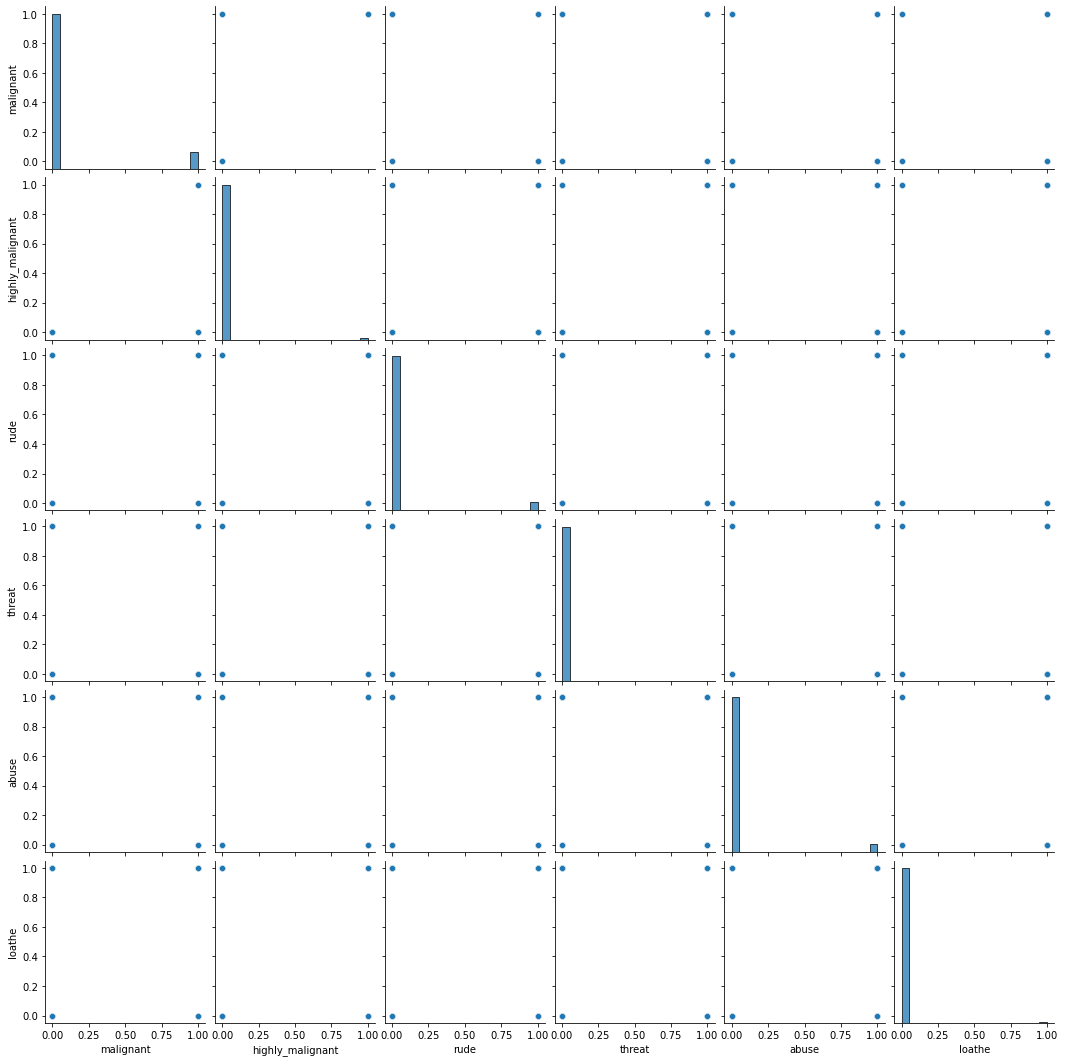

In [11]:
#Pair plot
sns.pairplot(train_data)

In [12]:
#Value counts for the `labels
train_data['malignant'].value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [13]:
train_data['highly_malignant'].value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

In [14]:
train_data['rude'].value_counts()

0    151122
1      8449
Name: rude, dtype: int64

In [15]:
train_data['threat'].value_counts()

0    159093
1       478
Name: threat, dtype: int64

In [16]:
train_data['abuse'].value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

In [17]:
train_data['loathe'].value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

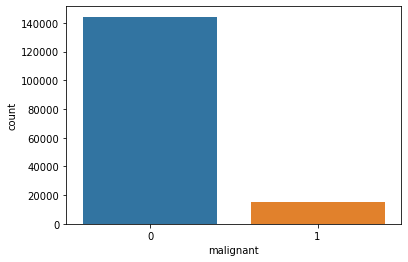

0    144277
1     15294
Name: malignant, dtype: int64


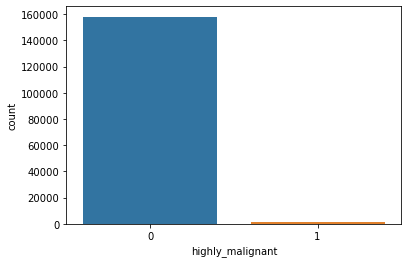

0    157976
1      1595
Name: highly_malignant, dtype: int64


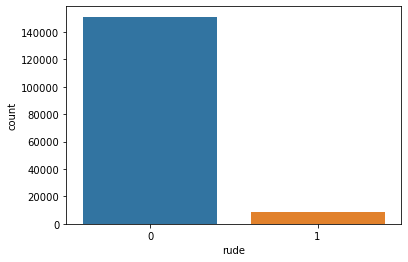

0    151122
1      8449
Name: rude, dtype: int64


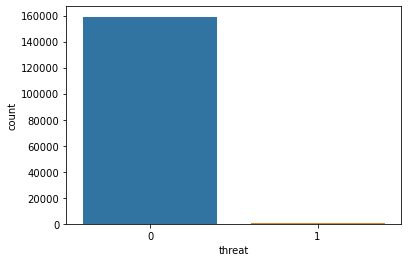

0    159093
1       478
Name: threat, dtype: int64


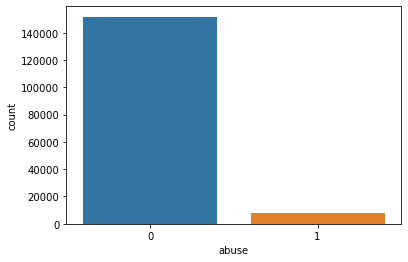

0    151694
1      7877
Name: abuse, dtype: int64


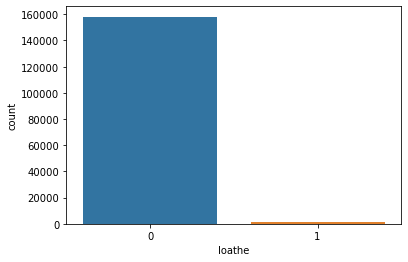

0    158166
1      1405
Name: loathe, dtype: int64


In [18]:
#Plotting the count plots for all the labels
for columns in train_data.iloc[:,2:]:
    sns.countplot(train_data[columns])
    plt.show()
    print(train_data[columns].value_counts())

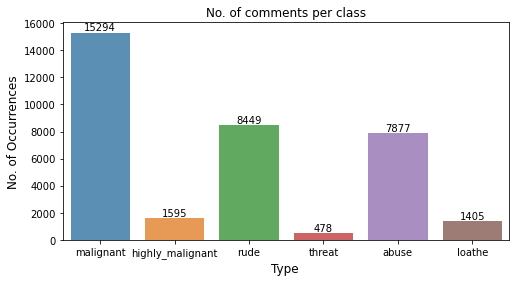

In [19]:
#Plotting the barplot with frequent occurance of the words
plt.figure(figsize=(8,4))
ax = sns.barplot(train_data.iloc[:,2:].sum().index,train_data.iloc[:,2:].sum().values, alpha=0.8)
plt.title("No. of comments per class")
plt.ylabel('No. of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
rects = ax.patches
labels =train_data.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()


In [22]:
# Create a bar graph 
sum_mal = train_data['malignant'].sum() / len(train_data) * 100
sum_hig = train_data['highly_malignant'].sum() / len(train_data) * 100
sum_rude =train_data['rude'].sum() / len(train_data) * 100
sum_thr =train_data['threat'].sum() / len(train_data) * 100
sum_abu =train_data['abuse'].sum() / len(train_data) * 100
sum_loa =train_data['loathe'].sum() / len(train_data) * 100

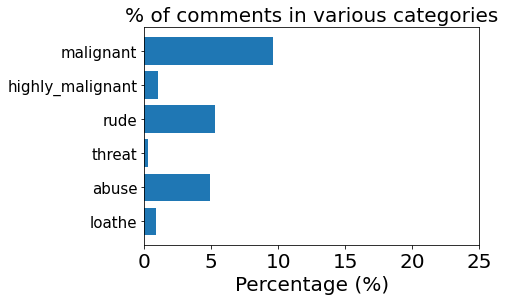

In [23]:
# Let the ind variable be the x-axis, whereas the % of toxicity for each category be the y-axis.
# Sequence of % have been sorted manually. This method cannot be done if there are large numbers of categories.
# Initiate a list of 6 values that represent the 6 x-axis values for the categories
ind = np.arange(6)
ax = plt.barh(ind, [sum_mal, sum_hig, sum_rude, sum_thr, sum_abu, sum_loa])
plt.xlabel('Percentage (%)', size=20)
plt.xticks(np.arange(0, 30, 5), size=20)
plt.title('% of comments in various categories', size=20)
plt.yticks(ind, ('malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe' ), size=15)

# Invert the graph so that it is in descending order.
plt.gca().invert_yaxis()
plt.show()


In [11]:
#dropping unwanted columns
train_data.drop(columns=['id'],axis=1,inplace=True)

In [135]:
#dropping the unwanted columns from test dataset
test_data.drop(['id'],axis=1,inplace=True)

In [13]:
#adding a new column which represent a normal statement
labels= ['malignant','highly_malignant','rude','threat','abuse','loathe']
train_data['normal']=1-train_data[labels].max(axis=1)

The normal column represents the text which is not present in the other labels.

In [14]:
train_data.head(7)

comment_text  malignant  \
0  Explanation\nWhy the edits made under my usern...          0   
1  D'aww! He matches this background colour I'm s...          0   
2  Hey man, I'm really not trying to edit war. It...          0   
3  "\nMore\nI can't make any real suggestions on ...          0   
4  You, sir, are my hero. Any chance you remember...          0   
5  "\n\nCongratulations from me as well, use the ...          0   
6       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK          1   

   highly_malignant  rude  threat  abuse  loathe  normal  
0                 0     0       0      0       0       1  
1                 0     0       0      0       0       1  
2                 0     0       0      0       0       1  
3                 0     0       0      0       0       1  
4                 0     0       0      0       0       1  
5                 0     0       0      0       0       1  
6                 1     1       0      1       0       0

In [15]:
#adding a column 'raw length' to the dataset which will show the length of characters in column 'comment_text'
train_data['Raw length']= train_data.comment_text.str.len().astype('int64')
train_data.head(7)

comment_text  malignant  \
0  Explanation\nWhy the edits made under my usern...          0   
1  D'aww! He matches this background colour I'm s...          0   
2  Hey man, I'm really not trying to edit war. It...          0   
3  "\nMore\nI can't make any real suggestions on ...          0   
4  You, sir, are my hero. Any chance you remember...          0   
5  "\n\nCongratulations from me as well, use the ...          0   
6       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK          1   

   highly_malignant  rude  threat  abuse  loathe  normal  Raw length  
0                 0     0       0      0       0       1         264  
1                 0     0       0      0       0       1         112  
2                 0     0       0      0       0       1         233  
3                 0     0       0      0       0       1         622  
4                 0     0       0      0       0       1          67  
5                 0     0       0      0       0       1          65  
6                 1     1       0      1       0       0          44

In [16]:
stopwords=['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'yo','nothin','from','bein','u','ok','yup','youve',
           'your','yours','yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','ur','mlm','nbfc',"he's",'ip','ja',"there's",'tyme','yep'
           'herself','it',"it's",'its','itself','they','them','their','theirs','themselves','what','which','lol','lool','fwiw','argh',"dont","i'll",'utc','too','y','u','r','doesnt'
           'who','whom','this','that',"that'll",'these','how','these','those','am','is','are','was','were','oh','hay','thanks','ty','wc','ha','hi','d','re','ll','there','someone','say',
           'be','been','being','have','has','had','having','do','does','did','done','doing','a','an','the','even','aww','bye!','bye','e','f','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against',
           'between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how',
           'all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don',"don't",'should',"should've",'now','d','ll','m',
           'o','re','ve','y','ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn',"hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'ma','mightn',"mightn't",'mustn',"mustn't",'needn',
           "needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn',"wouldn't", 'looked', "what's",'although','upright','bit','right','state',"i've",'much','more',
           "there's","You've",'got',"i'd",'everything','true','yes','moreover','would','could','like','mr.','but',"i'm",'able','back','get','still','ought','perhaps','without','away','onto','ive','let',
          'must','see','went','saw','many','whats','id','let','day','never','yet','im','go','thatll','theyre','came','youll','come','word','noone',"mrs.","now!","then?",'mr','ve','Â Â','january','days','february','march','april','may','june','july','august','september',
           'october','november','december','everyone','hey','ok','okay','cant','bbq','let','thats','also','time','name','oh','said','asked','anyone','however','wow','daww']

In [17]:
#CREATING A FUNCTION TO PERFORM ASERIES OF OPERATIONS

def preprocess(text):
    processed=[]
    lower=text.lower().replace(r'\n'," ").replace(r'^.+@[^\.].*\.[a-z]{2,}$',' ').replace(r'^http://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',' ')
    #converting to lower case and replacing mail id,links by white space
    
    text=lower.replace(r'\s+', ' ').replace(r'\d+(\.\d+)?', ' ')
    #removing \n,large white space and leading_trailing white spaces, numbers by white space
    
    text=lower.replace(r"[^a-zA-Z]+", " ").replace(r"—"," ").replace(r'“', ' ').replace(r'”',' ').replace('’',' ').replace(r'–',' ').replace('«', ' ').replace('»',' ')
    text=text.replace('®',' ').replace('´',' ').replace('·',' ').replace('½',' ').replace('¾',' ').replace('¤',' ')
    #removing special characters by space
    
   
   
    punct=text.translate(str.maketrans('', '', p))  #remove punctuation
    digit=punct.translate(str.maketrans('', '', d))       #remove digits if any
    word= wt(digit, "english")
    
    for i in word:
        if i not in stopwords and len(i)>=3 and len(i)<12:
            lemma=porter().stem(wl().lemmatize(i))
           # lemma=wl().lemmatize(i)
            #stem=porter.stem(lemma)
            processed.append(lemma)
    return (" ".join([x for x in processed])).strip()

In [18]:
%%time
cleaned_text = []

for i in train_data.comment_text:
    cleaned_text.append(preprocess(i))

Wall time: 4min 30s


In [19]:
print("Length of cleaned text=\t",len(cleaned_text))
print(cleaned_text[5])

Length of cleaned text=	 159571
well use tool well talk


In [20]:
#USING THE EXTRACTED FEATURE AS ''comment" also adding an extra column to represent the length of string of the cleaned comments
processed = pd.DataFrame({'comment_clean_text' : cleaned_text })
train_data['comment_clean_text']= processed

train_data['comment_length']=train_data['comment_clean_text'].str.len().astype('int64')
train_data.head(15)

comment_text  malignant  \
0   Explanation\nWhy the edits made under my usern...          0   
1   D'aww! He matches this background colour I'm s...          0   
2   Hey man, I'm really not trying to edit war. It...          0   
3   "\nMore\nI can't make any real suggestions on ...          0   
4   You, sir, are my hero. Any chance you remember...          0   
5   "\n\nCongratulations from me as well, use the ...          0   
6        COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK          1   
7   Your vandalism to the Matt Shirvington article...          0   
8   Sorry if the word 'nonsense' was offensive to ...          0   
9   alignment on this subject and which are contra...          0   
10  "\nFair use rationale for Image:Wonju.jpg\n\nT...          0   
11  bbq \n\nbe a man and lets discuss it-maybe ove...          0   
12  Hey... what is it..\n@ | talk .\nWhat is it......          1   
13  Before you start throwing accusations and warn...          0   
14  Oh, and the girl above started her arguments w...          0   

    highly_malignant  rude  threat  abuse  loathe  normal  Raw length  \
0                  0     0       0      0       0       1         264   
1                  0     0       0      0       0       1         112   
2                  0     0       0      0       0       1         233   
3                  0     0       0      0       0       1         622   
4                  0     0       0      0       0       1          67   
5                  0     0       0      0       0       1          65   
6                  1     1       0      1       0       0          44   
7                  0     0       0      0       0       1         115   
8                  0     0       0      0       0       1         472   
9                  0     0       0      0       0       1          70   
10                 0     0       0      0       0       1        2875   
11                 0     0       0      0       0       1          56   
12                 0     0       0      0       0       0         319   
13                 0     0       0      0       0       1         819   
14                 0     0       0      0       0       1         219   

                                   comment_clean_text  comment_length  
0   explan edit made usernam hardcor metallica fan...             141  
1        match background colour seemingli stuck talk              44  
2   man realli tri edit war guy constantli remov r...             114  
3   make real suggest improv wonder section statis...             250  
4                          sir hero chanc rememb page              26  
5                             well use tool well talk              23  
6                           cocksuck piss around work              25  
7     vandal matt shirvington articl revert pleas ban              47  
8   sorri nonsens offens anyway intend write anyth...             201  
9                    align subject contrari dulithgow              32  
10  fair use rational upload notic imag page speci...            1414  
11                         man let discu itmayb phone              26  
12  talk exclus group talibanswho good destroy pur...             146  
13  start throw accus warn let review edit hominem...             391  
14  girl start argument stuck nose doesnt belong b...              90

In [21]:
%%time
comments = []

for i in test_data.comment_text:
    comments.append(preprocess(i))

Wall time: 3min 47s


In [82]:
#USING THE EXTRACTED FEATURE AS ''comment" also adding an extra column to represent the length of string of the cleaned comments
processed = pd.DataFrame({'comment_clean_text' : comments })
test_data['comment_clean_text']= processed
test_data.head(5)

comment_text  \
0  Yo bitch Ja Rule is more succesful then you'll...   
1  == From RfC == \n\n The title is fine as it is...   
2  " \n\n == Sources == \n\n * Zawe Ashton on Lap...   
3  :If you have a look back at the source, the in...   
4          I don't anonymously edit articles at all.   

                                  comment_clean_text  
0  bitch rule succes ever hate sad mofuckasi bitc...  
1                                  rfc titl fine imo  
2                           sourc zaw ashton lapland  
3  look sourc inform updat correct form guess sou...  
4                                 anonym edit articl

In [23]:
# Wordcloud for visualising most used words
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

In [24]:
def wordcloud(train_data, label):
    
    # Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
    subset=train_data[train_data[label]==1]
    text=subset.comment_text.values
    wc= WordCloud(background_color="black",max_words=4000)
    wc.generate(" ".join(text))

    plt.figure(figsize=(25,25))
    plt.subplot(221)
    plt.axis("off")
    plt.title("Words frequented in {}".format(label), fontsize=20)
    plt.imshow(wc.recolor(random_state=244), alpha=0.98)

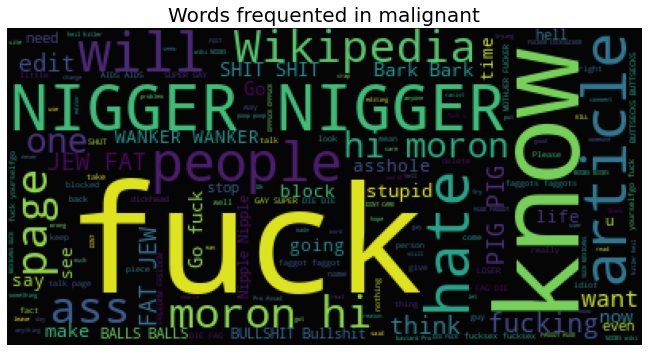

In [25]:
wordcloud(train_data,'malignant')

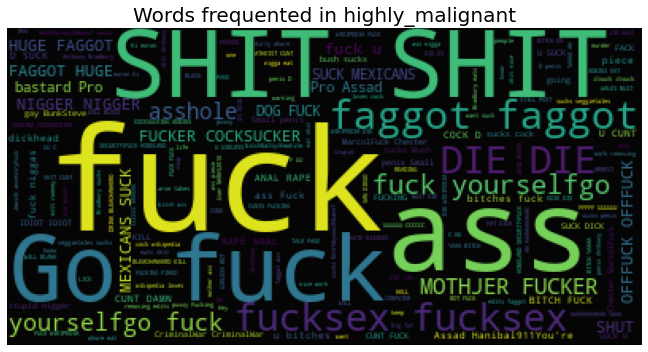

In [26]:
wordcloud(train_data,'highly_malignant')

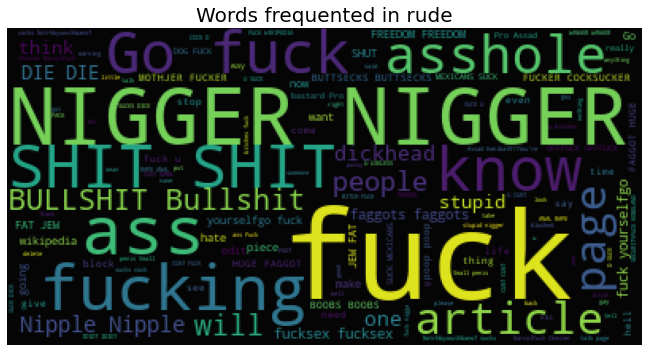

In [27]:
wordcloud(train_data,'rude')

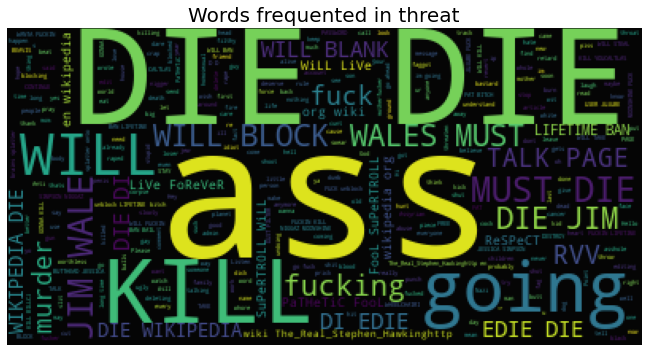

In [28]:
wordcloud(train_data,'threat')

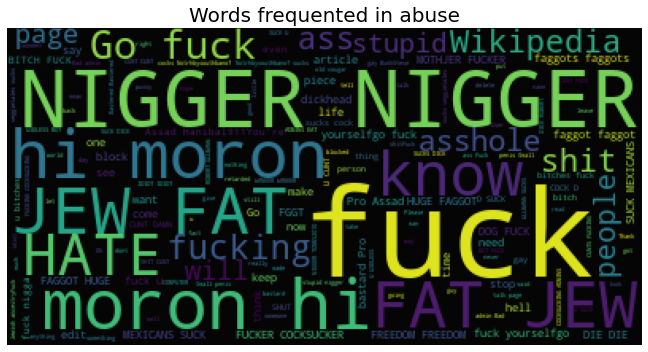

In [29]:
wordcloud(train_data, 'abuse')

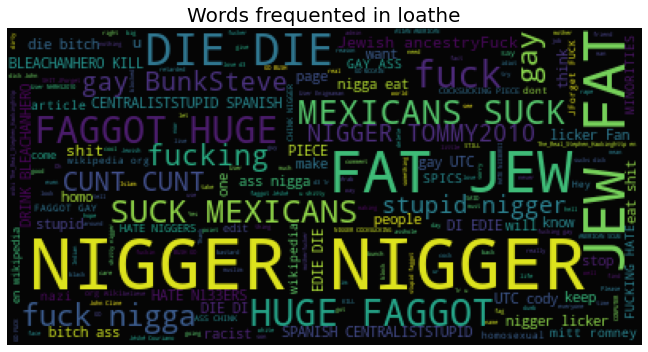

In [30]:
wordcloud(train_data,'loathe')

In [32]:
X=train_data.comment_text
y=train_data.iloc[:,1:-3]

In [42]:
# Model Building
#Importing libraries
from sklearn.feature_extraction.text import TfidfVectorizer as tf
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,classification_report,f1_score,auc,roc_curve,roc_auc_score,confusion_matrix,log_loss,\
precision_score,recall_score,mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

In [34]:
tfidf=tf(input='content', encoding='utf-8', lowercase=True,stop_words='english',max_features=5000,ngram_range=(1,3))

In [35]:
x=tfidf.fit_transform(X).toarray()

In [36]:
#CHECKING THE SELECTED FEATURE NAMES
tfidf.get_feature_names()[1:9]

['000', '01', '02', '03', '04', '05', '06', '07']

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=55)

In [38]:
print('shape of x_train:',x_train.shape,'\nshape of x_test:',x_test.shape)

print('shape of y_train:',y_train.shape,'\nshape of y_test:',y_test.shape)

shape of x_train: (119678, 5000) 
shape of x_test: (39893, 5000)
shape of y_train: (119678, 7) 
shape of y_test: (39893, 7)


In [39]:
labels=['malignant','highly_malignant','rude','threat','abuse','loathe','normal']

### Logistic Regression

Processing malignant
-------------------------------------
ACCURACY SCORE: 0.9546035645351315

F1 score: 0.7129497543192265

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     36072
           1       0.90      0.59      0.71      3821

    accuracy                           0.95     39893
   macro avg       0.93      0.79      0.84     39893
weighted avg       0.95      0.95      0.95     39893


PRECISION:
 0.9039389067524116

RECALL:
 0.5885893745092907

MEAN SQUARED ERROR:
 0.045396435464868524

ROOT MEAN SQ. ERROR:
 0.2130643927662915

LOG_LOSS: 1.5679421240560771

AUC_ROC Score:
 0.7909818684478146

TPR: [0.         0.00662564 1.        ] 
FPR: [0.         0.58858937 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



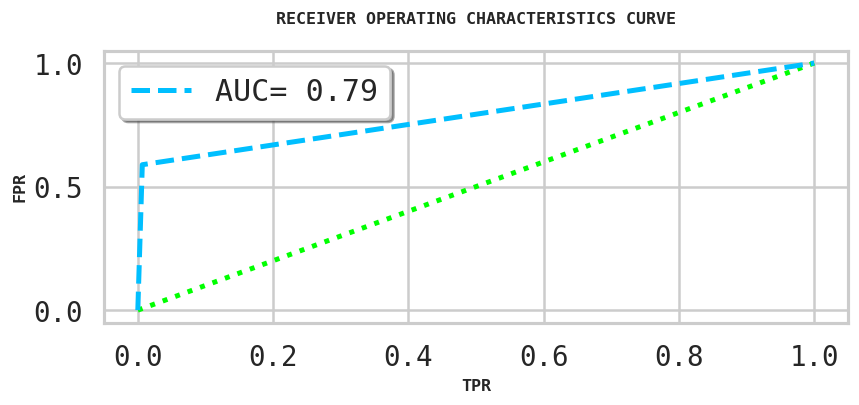





	____________________________________________CONFUSION MATRIX___________________________________________



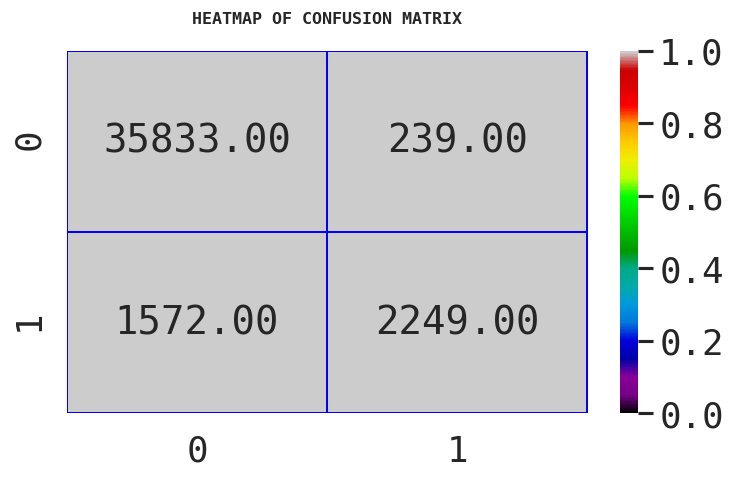



Processing highly_malignant
-------------------------------------
ACCURACY SCORE: 0.9905497205023438

F1 score: 0.3082568807339449

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     39485
           1       0.61      0.21      0.31       408

    accuracy                           0.99     39893
   macro avg       0.80      0.60      0.65     39893
weighted avg       0.99      0.99      0.99     39893


PRECISION:
 0.6131386861313869

RECALL:
 0.20588235294117646

MEAN SQUARED ERROR:
 0.009450279497656231

ROOT MEAN SQ. ERROR:
 0.09721254804631052

LOG_LOSS: 0.3264021527472279

AUC_ROC Score:
 0.6022700355309909

TPR: [0.         0.00134228 1.        ] 
FPR: [0.         0.20588235 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



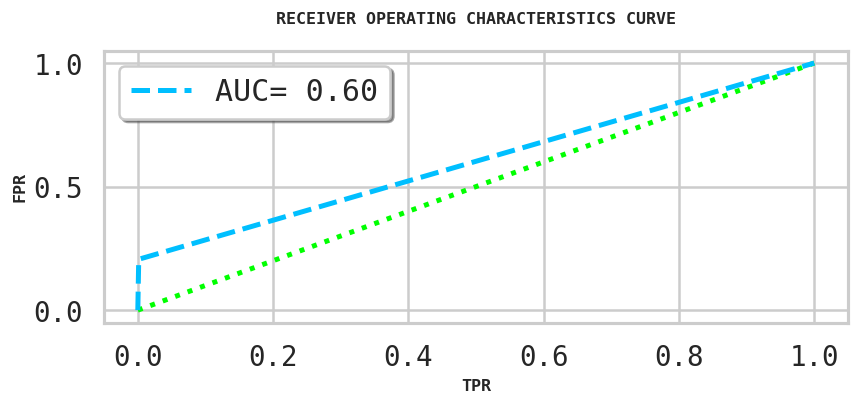





	____________________________________________CONFUSION MATRIX___________________________________________



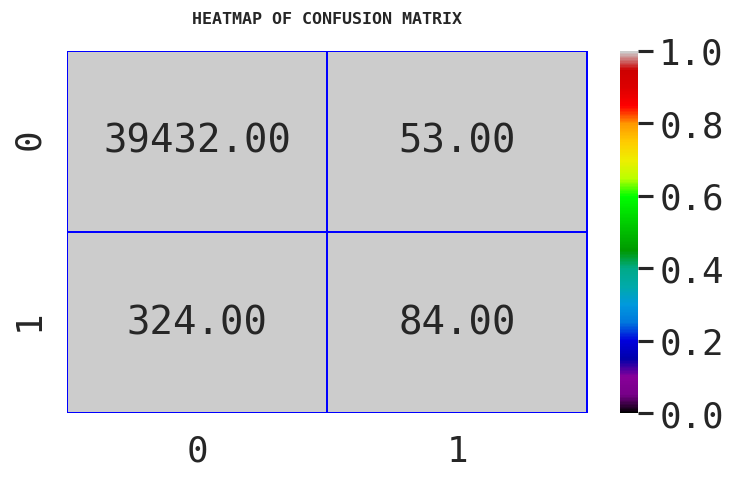



Processing rude
-------------------------------------
ACCURACY SCORE: 0.977038578196676

F1 score: 0.7391799544419134

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     37815
           1       0.91      0.62      0.74      2078

    accuracy                           0.98     39893
   macro avg       0.94      0.81      0.86     39893
weighted avg       0.98      0.98      0.98     39893


PRECISION:
 0.905160390516039

RECALL:
 0.6246390760346487

MEAN SQUARED ERROR:
 0.022961421803323893

ROOT MEAN SQ. ERROR:
 0.1515302669545721

LOG_LOSS: 0.7930621392973385

AUC_ROC Score:
 0.8105213098010081

TPR: [0.         0.00359646 1.        ] 
FPR: [0.         0.62463908 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



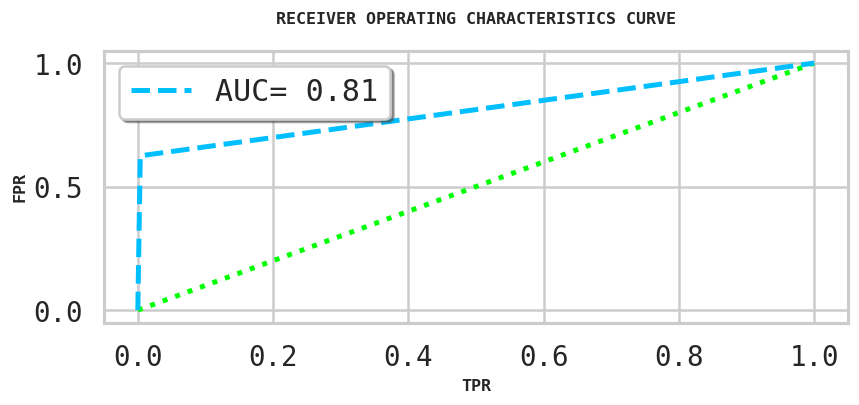





	____________________________________________CONFUSION MATRIX___________________________________________



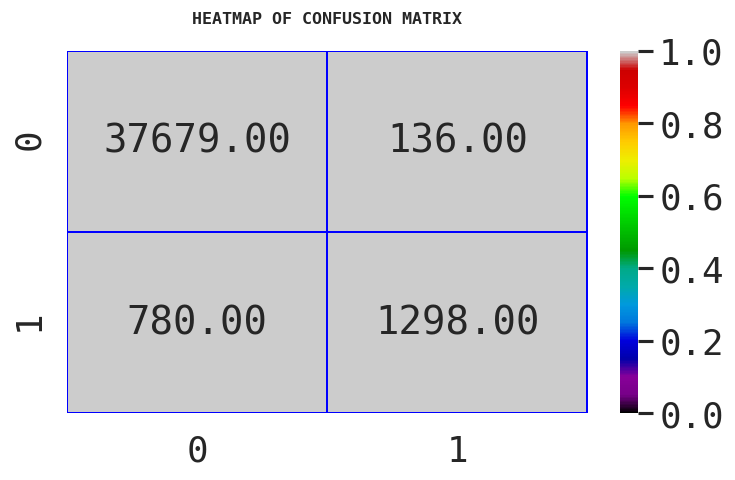



Processing threat
-------------------------------------
ACCURACY SCORE: 0.997443160454215

F1 score: 0.22727272727272727

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39784
           1       0.65      0.14      0.23       109

    accuracy                           1.00     39893
   macro avg       0.82      0.57      0.61     39893
weighted avg       1.00      1.00      1.00     39893


PRECISION:
 0.6521739130434783

RECALL:
 0.13761467889908258

MEAN SQUARED ERROR:
 0.002556839545784975

ROOT MEAN SQ. ERROR:
 0.050565200936859483

LOG_LOSS: 0.08831026969795128

AUC_ROC Score:
 0.5687067965177095

TPR: [0.00000000e+00 2.01085864e-04 1.00000000e+00] 
FPR: [0.         0.13761468 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



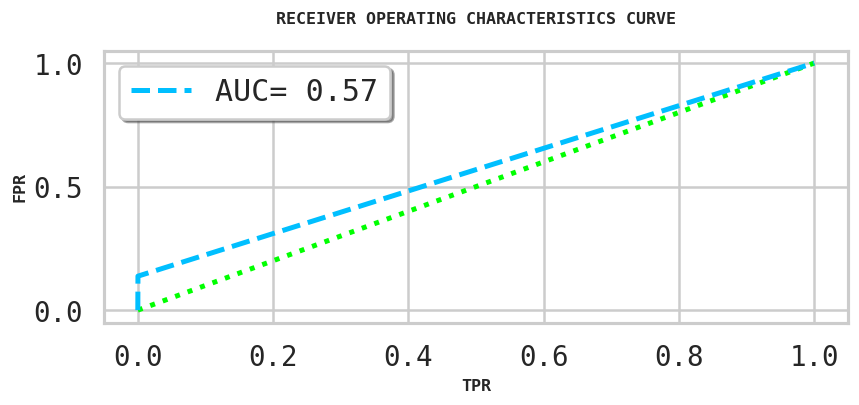





	____________________________________________CONFUSION MATRIX___________________________________________



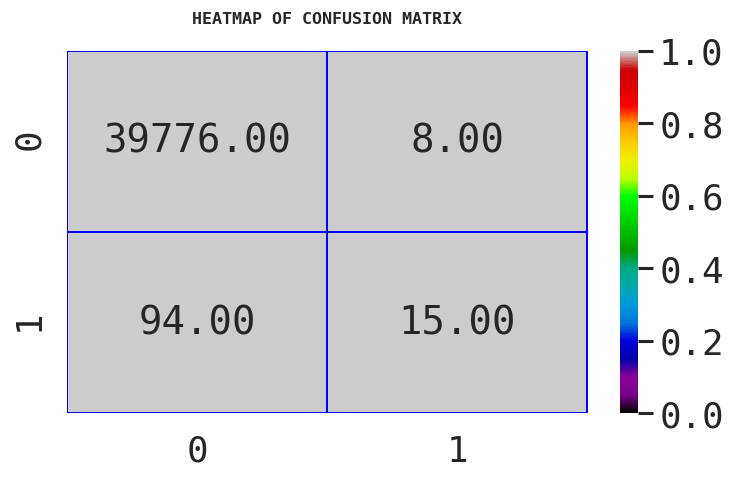



Processing abuse
-------------------------------------
ACCURACY SCORE: 0.970095004136064

F1 score: 0.6213900349095525

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     37956
           1       0.81      0.51      0.62      1937

    accuracy                           0.97     39893
   macro avg       0.89      0.75      0.80     39893
weighted avg       0.97      0.97      0.97     39893


PRECISION:
 0.8064250411861614

RECALL:
 0.5054207537429014

MEAN SQUARED ERROR:
 0.02990499586393603

ROOT MEAN SQ. ERROR:
 0.17293060996809104

LOG_LOSS: 1.0328866754699966

AUC_ROC Score:
 0.749614687125429

TPR: [0.         0.00619138 1.        ] 
FPR: [0.         0.50542075 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



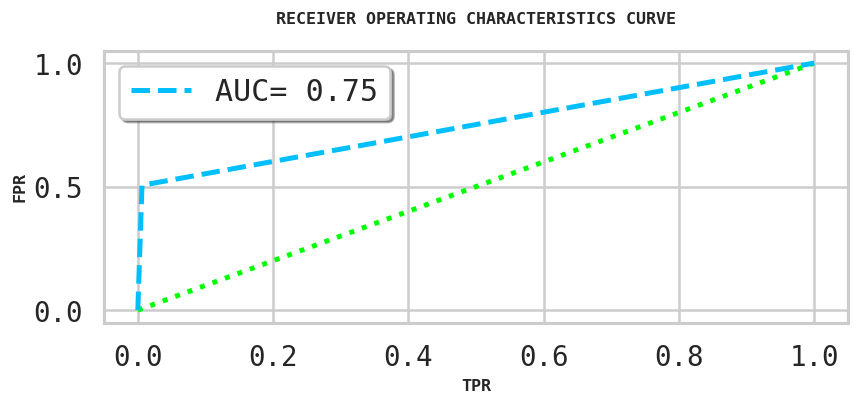





	____________________________________________CONFUSION MATRIX___________________________________________



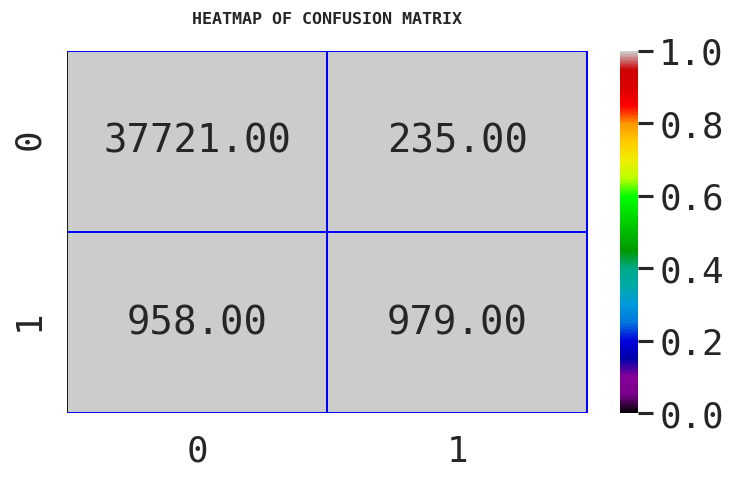



Processing loathe
-------------------------------------
ACCURACY SCORE: 0.9925801519063495

F1 score: 0.2562814070351759

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     39574
           1       0.65      0.16      0.26       319

    accuracy                           0.99     39893
   macro avg       0.82      0.58      0.63     39893
weighted avg       0.99      0.99      0.99     39893


PRECISION:
 0.6455696202531646

RECALL:
 0.15987460815047022

MEAN SQUARED ERROR:
 0.007419848093650515

ROOT MEAN SQ. ERROR:
 0.08613854011794322

LOG_LOSS: 0.2562730354102636

AUC_ROC Score:
 0.5795835364500267

TPR: [0.0000000e+00 7.0753525e-04 1.0000000e+00] 
FPR: [0.         0.15987461 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



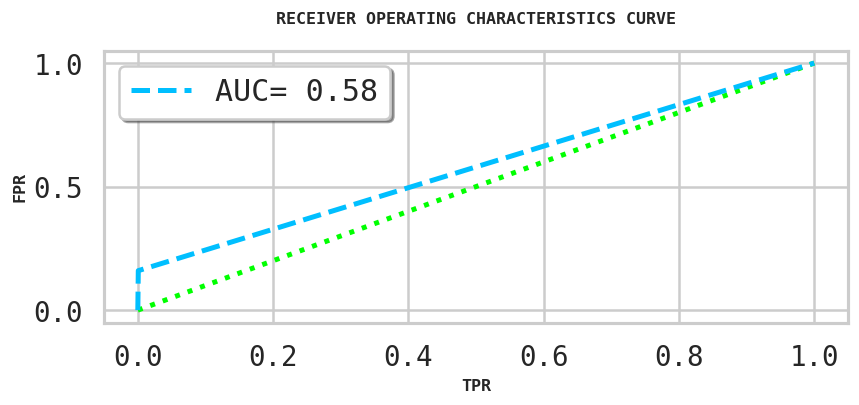





	____________________________________________CONFUSION MATRIX___________________________________________



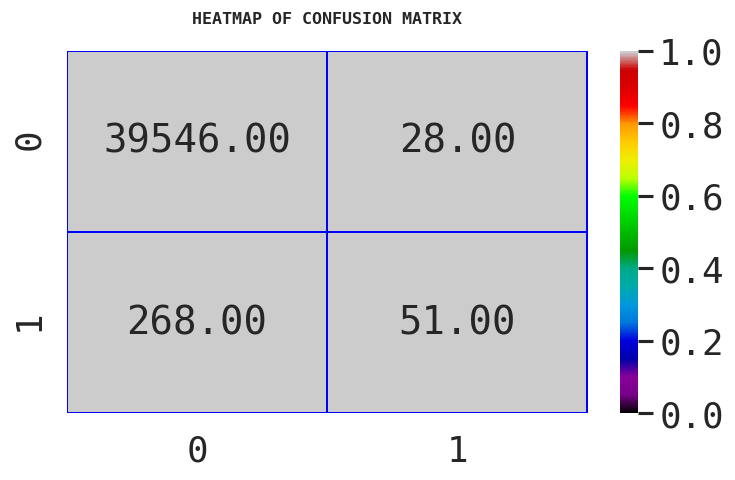



Processing normal
-------------------------------------
ACCURACY SCORE: 0.9533000777078685

F1 score: 0.9745091332010671

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.92      0.59      0.72      4067
           1       0.96      0.99      0.97     35826

    accuracy                           0.95     39893
   macro avg       0.94      0.79      0.85     39893
weighted avg       0.95      0.95      0.95     39893


PRECISION:
 0.9557690759279637

RECALL:
 0.9939987718416792

MEAN SQUARED ERROR:
 0.04669992229213145

ROOT MEAN SQ. ERROR:
 0.21610164805510265

LOG_LOSS: 1.6129912054817537

AUC_ROC Score:
 0.7943930421785234

TPR: [0.         0.40521269 1.        ] 
FPR: [0.         0.99399877 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



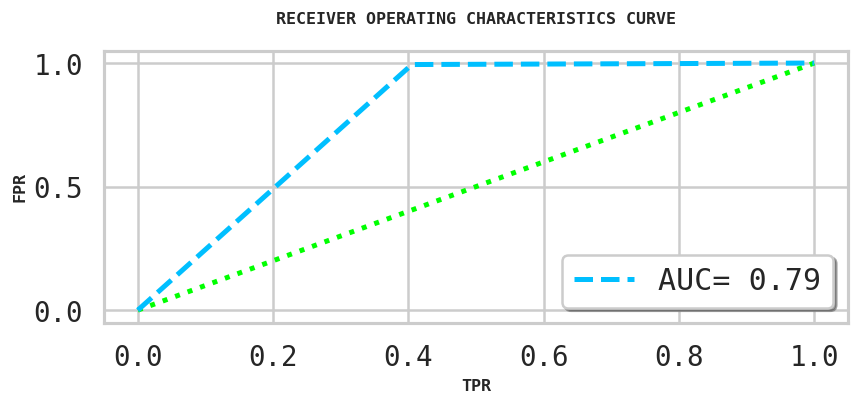





	____________________________________________CONFUSION MATRIX___________________________________________



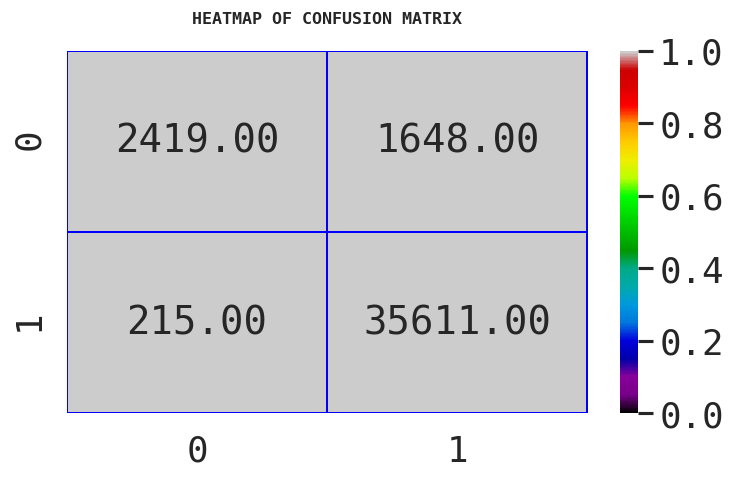

In [40]:
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1))])
F1=[]
ACCURACY = []
PRECESION = []
RECALL = []
RMSE = []
MSE = []
AUC=[]
TPR=[]
FPR=[]
CV_ACC=[]
LOG_LOSS=[]

for category in labels:
    print('Processing {}'.format(category))
    print('-------------------------------------')
    LogReg_pipeline.fit(x_train, y_train[category])
    pred = LogReg_pipeline.predict(x_test)
    f1=f1_score(pred,y_test[category])
    acc=accuracy_score(pred,y_test[category])
    clr=classification_report(y_test[category],pred)
    pre=precision_score(y_test[category],pred)
    rec=recall_score(y_test[category],pred)
    mse=mean_squared_error(y_test[category],pred)
    rmse=np.sqrt(mse)
    log = log_loss( y_test[category],pred)
    auc_scr=roc_auc_score(y_test[category],pred)
    tpr,fpr,threshold=roc_curve(y_test[category],pred)
    conf=confusion_matrix(y_test[category],pred)
        

    print('ACCURACY SCORE:', acc)
    print('\nF1 score:',f1)
    print('\nCLASSIFICATION REPORT:\n',clr)
    print('\nPRECISION:\n',pre)
    print('\nRECALL:\n',rec)
    print('\nMEAN SQUARED ERROR:\n',mse)
    print('\nROOT MEAN SQ. ERROR:\n',rmse)
    print('\nLOG_LOSS:',log)
    print('\nAUC_ROC Score:\n',auc_scr)
    print('\nTPR:',tpr,'\nFPR:',fpr)
    
    print('\n')
    #plotting the auc_roc curve
    print('\n\n\t____________________________________________ROC_AUC CURVE_______________________________________________')
    print()
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
    plt.figure(figsize=(8,3),dpi=120)
    plt.plot([0,1],[0,1],color='lime',linestyle=":",lw=3)
    plt.plot(tpr,fpr,label="AUC= %0.2f" % auc_scr,color='deepskyblue',lw=3,linestyle='--')
    plt.legend(fancybox=True,shadow=True, fontsize='medium')
    
    plt.xlabel("TPR",weight='bold',fontsize=10)
    plt.ylabel('FPR',weight='bold',fontsize=10)
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE\n',size=10,weight='bold',loc='center')
    plt.show()
    print('\n')
    #plotting confusion matrix
    print('\n\n\t____________________________________________CONFUSION MATRIX___________________________________________\n')
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
    plt.figure(figsize=(7,4),dpi=120)
    sns.heatmap(conf,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='nipy_spectral',linewidths=0.8, linecolor='blue')
    plt.title('HEATMAP OF CONFUSION MATRIX\n',size=10,weight='bold',loc='center')
    plt.show()
    print('\n')
    
    ACCURACY.append(acc)
    F1.append(f1)
    PRECESION.append(pre)
    RECALL.append(rec)
    RMSE.append(rmse)
    MSE.append(mse)
    AUC.append(auc_scr)
    TPR.append(tpr)
    FPR.append(fpr)
    LOG_LOSS.append(log)
    
#creating a dataframe to show the performance of the model

logi_results = pd.DataFrame({"LABELS":labels,"F1":F1,'Acuracy':ACCURACY,'Precision': PRECESION ,'Recall': RECALL,
                               'RMSE':RMSE,'MSE':MSE,'AUC':AUC,'LOG_LOSS':LOG_LOSS})
                               
logi_results.style.set_properties(**{'background-color':'midnightblue','color': 'lime','border-color': 'darkorange'})

### KNeighbors Classifier

Processing malignant
-------------------------------------
ACCURACY SCORE: 0.9546035645351315

F1 score: 0.7129497543192265

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     36072
           1       0.90      0.59      0.71      3821

    accuracy                           0.95     39893
   macro avg       0.93      0.79      0.84     39893
weighted avg       0.95      0.95      0.95     39893


PRECISION:
 0.9039389067524116

RECALL:
 0.5885893745092907

MEAN SQUARED ERROR:
 0.045396435464868524

ROOT MEAN SQ. ERROR:
 0.2130643927662915

LOG_LOSS: 1.5679421240560771

AUC_ROC Score:
 0.7909818684478146

TPR: [0.         0.00662564 1.        ] 
FPR: [0.         0.58858937 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



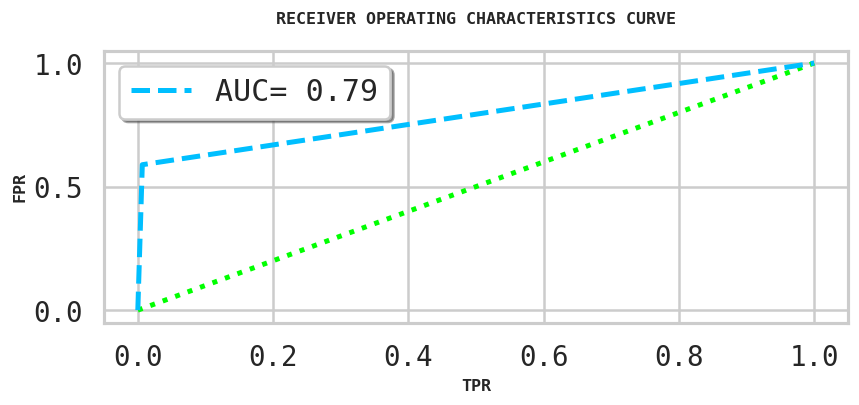





	____________________________________________CONFUSION MATRIX___________________________________________



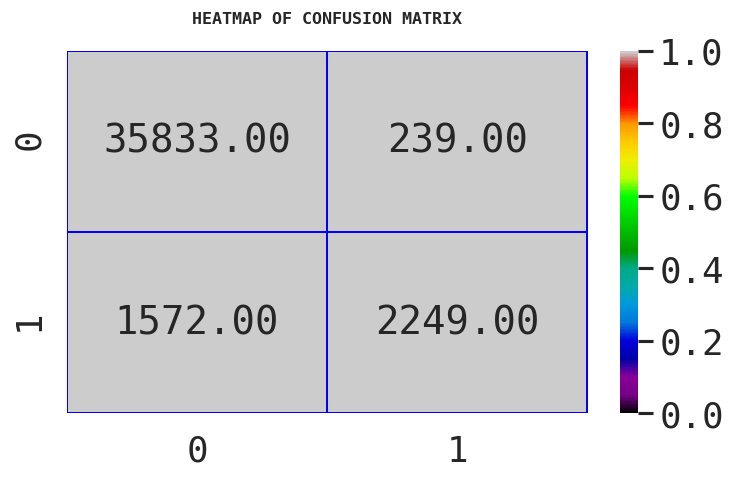



Processing highly_malignant
-------------------------------------
ACCURACY SCORE: 0.9905497205023438

F1 score: 0.3082568807339449

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     39485
           1       0.61      0.21      0.31       408

    accuracy                           0.99     39893
   macro avg       0.80      0.60      0.65     39893
weighted avg       0.99      0.99      0.99     39893


PRECISION:
 0.6131386861313869

RECALL:
 0.20588235294117646

MEAN SQUARED ERROR:
 0.009450279497656231

ROOT MEAN SQ. ERROR:
 0.09721254804631052

LOG_LOSS: 0.3264021527472279

AUC_ROC Score:
 0.6022700355309909

TPR: [0.         0.00134228 1.        ] 
FPR: [0.         0.20588235 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



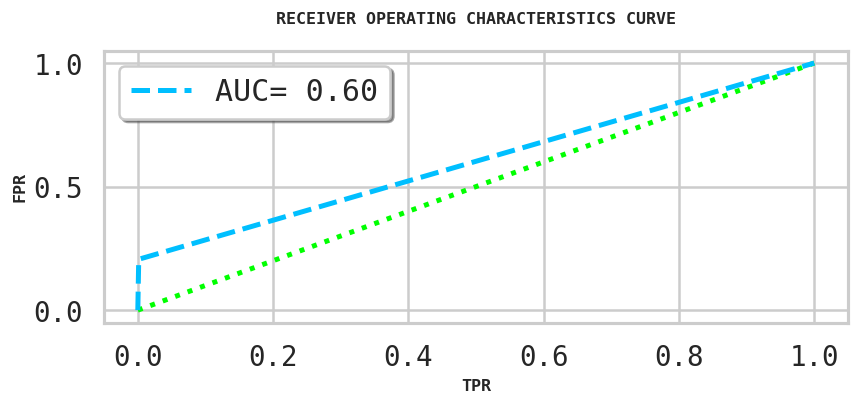





	____________________________________________CONFUSION MATRIX___________________________________________



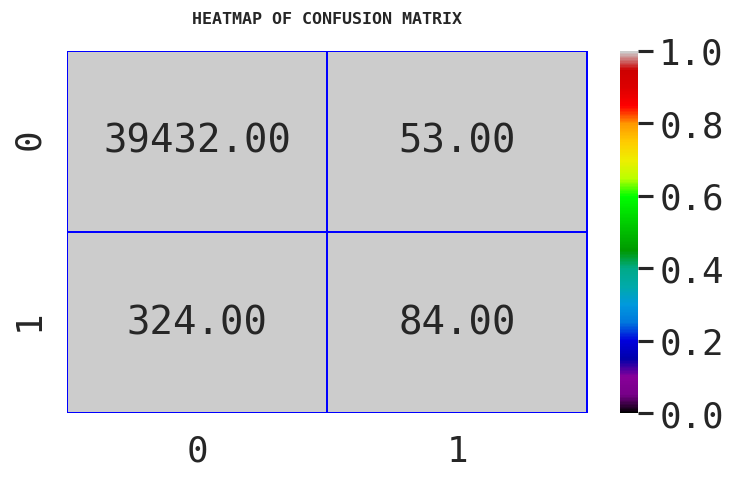



Processing rude
-------------------------------------
ACCURACY SCORE: 0.9770887123054169

F1 score: 0.7398975526465567

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     37815
           1       0.91      0.63      0.74      2078

    accuracy                           0.98     39893
   macro avg       0.94      0.81      0.86     39893
weighted avg       0.98      0.98      0.98     39893


PRECISION:
 0.9052924791086351

RECALL:
 0.6256015399422522

MEAN SQUARED ERROR:
 0.022911287694583008

ROOT MEAN SQ. ERROR:
 0.15136475050216616

LOG_LOSS: 0.7913305685257791

AUC_ROC Score:
 0.8110025417548099

TPR: [0.         0.00359646 1.        ] 
FPR: [0.         0.62560154 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



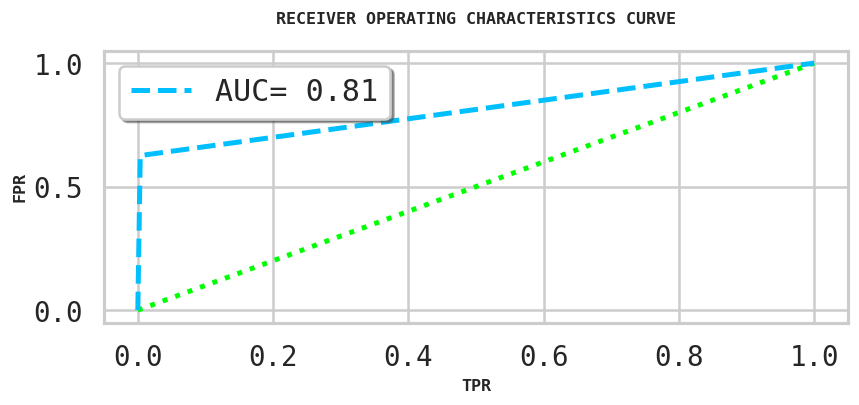





	____________________________________________CONFUSION MATRIX___________________________________________



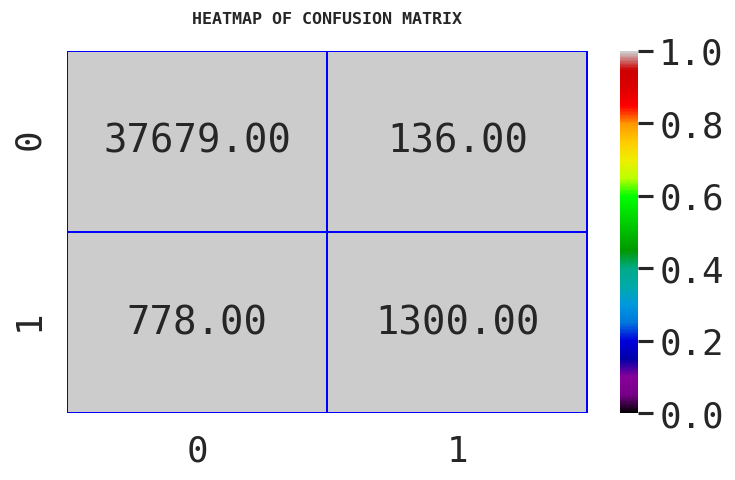



Processing threat
-------------------------------------
ACCURACY SCORE: 0.997443160454215

F1 score: 0.22727272727272727

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39784
           1       0.65      0.14      0.23       109

    accuracy                           1.00     39893
   macro avg       0.82      0.57      0.61     39893
weighted avg       1.00      1.00      1.00     39893


PRECISION:
 0.6521739130434783

RECALL:
 0.13761467889908258

MEAN SQUARED ERROR:
 0.002556839545784975

ROOT MEAN SQ. ERROR:
 0.050565200936859483

LOG_LOSS: 0.08831026969795128

AUC_ROC Score:
 0.5687067965177095

TPR: [0.00000000e+00 2.01085864e-04 1.00000000e+00] 
FPR: [0.         0.13761468 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



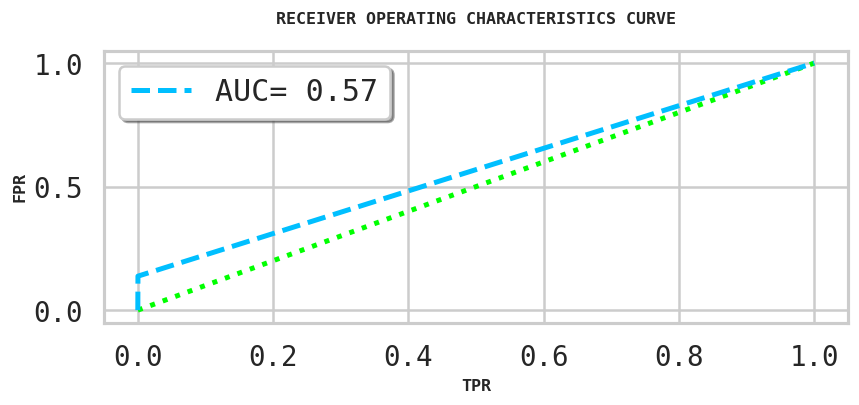





	____________________________________________CONFUSION MATRIX___________________________________________



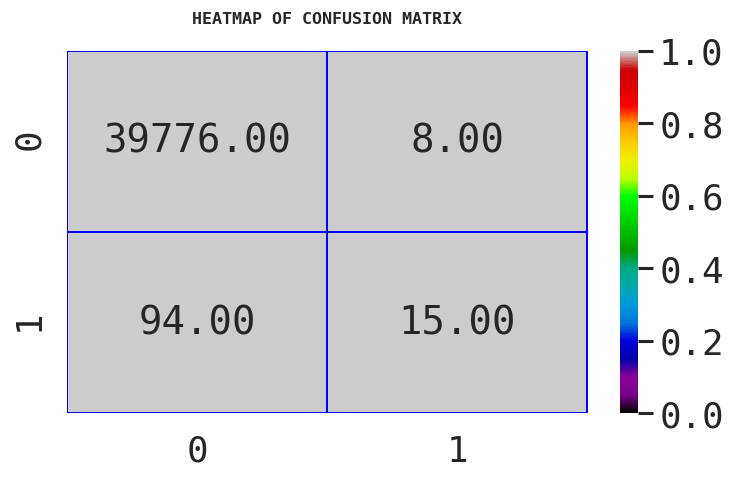



Processing abuse
-------------------------------------
ACCURACY SCORE: 0.970095004136064

F1 score: 0.6213900349095525

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     37956
           1       0.81      0.51      0.62      1937

    accuracy                           0.97     39893
   macro avg       0.89      0.75      0.80     39893
weighted avg       0.97      0.97      0.97     39893


PRECISION:
 0.8064250411861614

RECALL:
 0.5054207537429014

MEAN SQUARED ERROR:
 0.02990499586393603

ROOT MEAN SQ. ERROR:
 0.17293060996809104

LOG_LOSS: 1.0328866754699966

AUC_ROC Score:
 0.749614687125429

TPR: [0.         0.00619138 1.        ] 
FPR: [0.         0.50542075 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



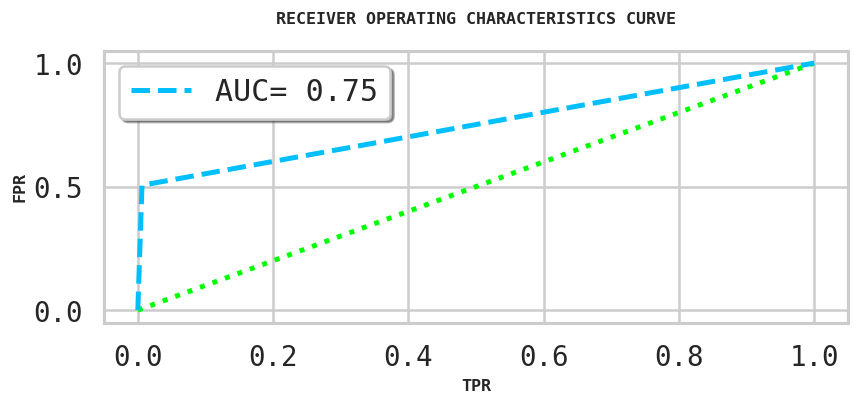





	____________________________________________CONFUSION MATRIX___________________________________________



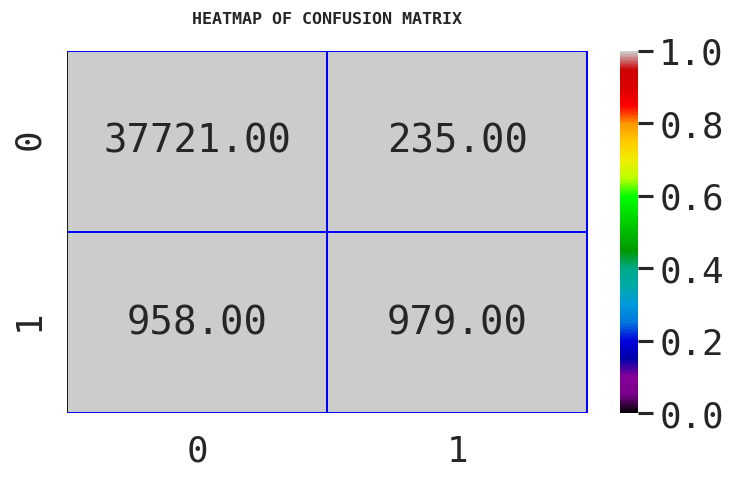



Processing loathe
-------------------------------------
ACCURACY SCORE: 0.9925801519063495

F1 score: 0.2562814070351759

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     39574
           1       0.65      0.16      0.26       319

    accuracy                           0.99     39893
   macro avg       0.82      0.58      0.63     39893
weighted avg       0.99      0.99      0.99     39893


PRECISION:
 0.6455696202531646

RECALL:
 0.15987460815047022

MEAN SQUARED ERROR:
 0.007419848093650515

ROOT MEAN SQ. ERROR:
 0.08613854011794322

LOG_LOSS: 0.2562730354102636

AUC_ROC Score:
 0.5795835364500267

TPR: [0.0000000e+00 7.0753525e-04 1.0000000e+00] 
FPR: [0.         0.15987461 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



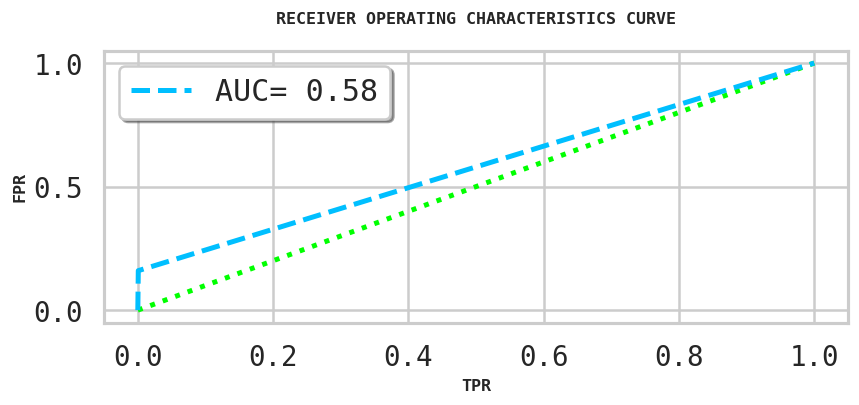





	____________________________________________CONFUSION MATRIX___________________________________________



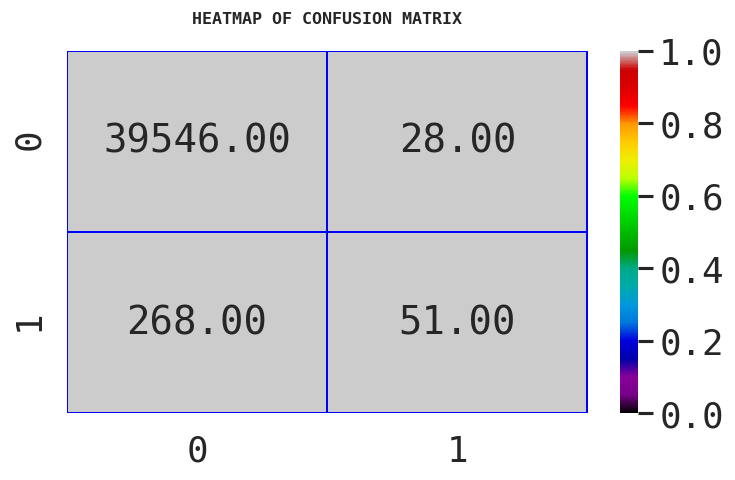



Processing normal
-------------------------------------
ACCURACY SCORE: 0.9533000777078685

F1 score: 0.9745091332010671

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.92      0.59      0.72      4067
           1       0.96      0.99      0.97     35826

    accuracy                           0.95     39893
   macro avg       0.94      0.79      0.85     39893
weighted avg       0.95      0.95      0.95     39893


PRECISION:
 0.9557690759279637

RECALL:
 0.9939987718416792

MEAN SQUARED ERROR:
 0.04669992229213145

ROOT MEAN SQ. ERROR:
 0.21610164805510265

LOG_LOSS: 1.6129912054817537

AUC_ROC Score:
 0.7943930421785234

TPR: [0.         0.40521269 1.        ] 
FPR: [0.         0.99399877 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



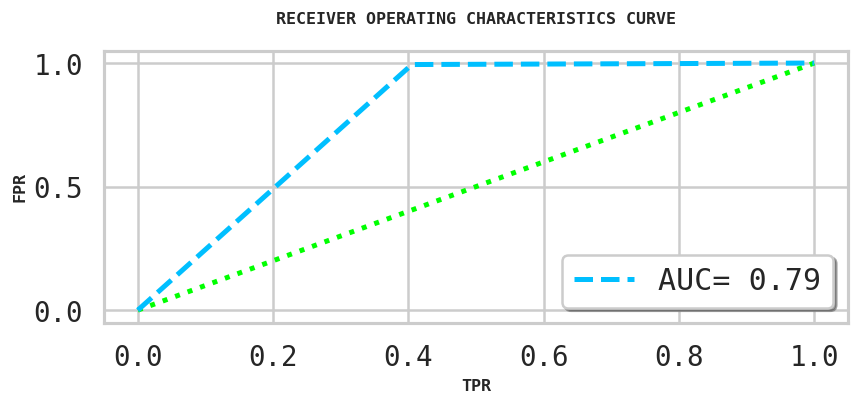





	____________________________________________CONFUSION MATRIX___________________________________________



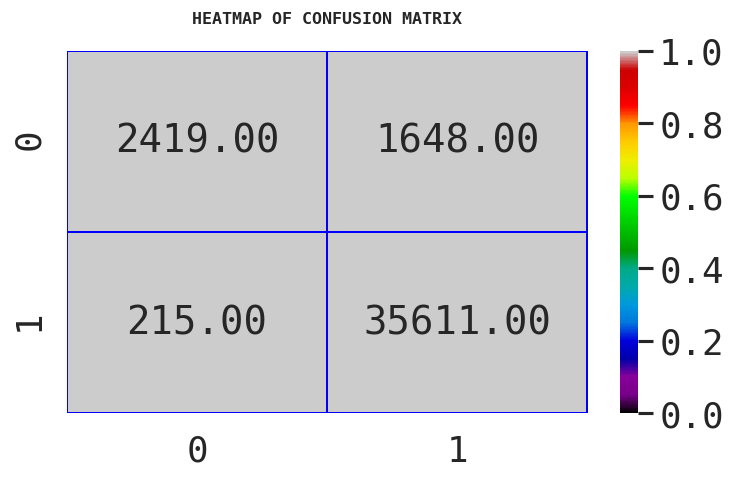

In [44]:
knn_pipeline = Pipeline([('clf', OneVsRestClassifier(KNeighborsClassifier(), n_jobs=1))])
F1=[]
ACCURACY = []
PRECESION = []
RECALL = []
RMSE = []
MSE = []
AUC=[]
TPR=[]
FPR=[]
CV_ACC=[]
LOG_LOSS=[]

for category in labels:
    print('Processing {}'.format(category))
    print('-------------------------------------')
    knn_pipeline.fit(x_train, y_train[category])
    pred = knn_pipeline.predict(x_test)
    f1=f1_score(pred,y_test[category])
    acc=accuracy_score(pred,y_test[category])
    clr=classification_report(y_test[category],pred)
    pre=precision_score(y_test[category],pred)
    rec=recall_score(y_test[category],pred)
    mse=mean_squared_error(y_test[category],pred)
    rmse=np.sqrt(mse)
    log = log_loss( y_test[category],pred)
    auc_scr=roc_auc_score(y_test[category],pred)
    tpr,fpr,threshold=roc_curve(y_test[category],pred)
    conf=confusion_matrix(y_test[category],pred)
        

    print('ACCURACY SCORE:', acc)
    print('\nF1 score:',f1)
    print('\nCLASSIFICATION REPORT:\n',clr)
    print('\nPRECISION:\n',pre)
    print('\nRECALL:\n',rec)
    print('\nMEAN SQUARED ERROR:\n',mse)
    print('\nROOT MEAN SQ. ERROR:\n',rmse)
    print('\nLOG_LOSS:',log)
    print('\nAUC_ROC Score:\n',auc_scr)
    print('\nTPR:',tpr,'\nFPR:',fpr)
    
    print('\n')
    #plotting the auc_roc curve
    print('\n\n\t____________________________________________ROC_AUC CURVE_______________________________________________')
    print()
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
    plt.figure(figsize=(8,3),dpi=120)
    plt.plot([0,1],[0,1],color='lime',linestyle=":",lw=3)
    plt.plot(tpr,fpr,label="AUC= %0.2f" % auc_scr,color='deepskyblue',lw=3,linestyle='--')
    plt.legend(fancybox=True,shadow=True, fontsize='medium')
    
    plt.xlabel("TPR",weight='bold',fontsize=10)
    plt.ylabel('FPR',weight='bold',fontsize=10)
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE\n',size=10,weight='bold',loc='center')
    plt.show()
    print('\n')
    #plotting confusion matrix
    print('\n\n\t____________________________________________CONFUSION MATRIX___________________________________________\n')
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
    plt.figure(figsize=(7,4),dpi=120)
    sns.heatmap(conf,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='nipy_spectral',linewidths=0.8, linecolor='blue')
    plt.title('HEATMAP OF CONFUSION MATRIX\n',size=10,weight='bold',loc='center')
    plt.show()
    print('\n')
    
    ACCURACY.append(acc)
    F1.append(f1)
    PRECESION.append(pre)
    RECALL.append(rec)
    RMSE.append(rmse)
    MSE.append(mse)
    AUC.append(auc_scr)
    TPR.append(tpr)
    FPR.append(fpr)
    LOG_LOSS.append(log)
    
#creating a dataframe to show the performance of the model

knn_results = pd.DataFrame({"LABELS":labels,"F1":F1,'Acuracy':ACCURACY,'Precision': PRECESION ,'Recall': RECALL,
                               'RMSE':RMSE,'MSE':MSE,'AUC':AUC,'LOG_LOSS':LOG_LOSS})
                               
knn_results.style.set_properties(**{'background-color':'midnightblue','color': 'lime','border-color': 'darkorange'})

### MultiNominal NavieBayes

Processing malignant
-------------------------------------
ACCURACY SCORE: 0.9483869350512621

F1 score: 0.653658536585366

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     36072
           1       0.91      0.51      0.65      3821

    accuracy                           0.95     39893
   macro avg       0.93      0.75      0.81     39893
weighted avg       0.95      0.95      0.94     39893


PRECISION:
 0.914783427495292

RECALL:
 0.5085056267992673

MEAN SQUARED ERROR:
 0.05161306494873787

ROOT MEAN SQ. ERROR:
 0.2271850896268016

LOG_LOSS: 1.7826557372034189

AUC_ROC Score:
 0.7517439422530379

TPR: [0.         0.00501774 1.        ] 
FPR: [0.         0.50850563 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



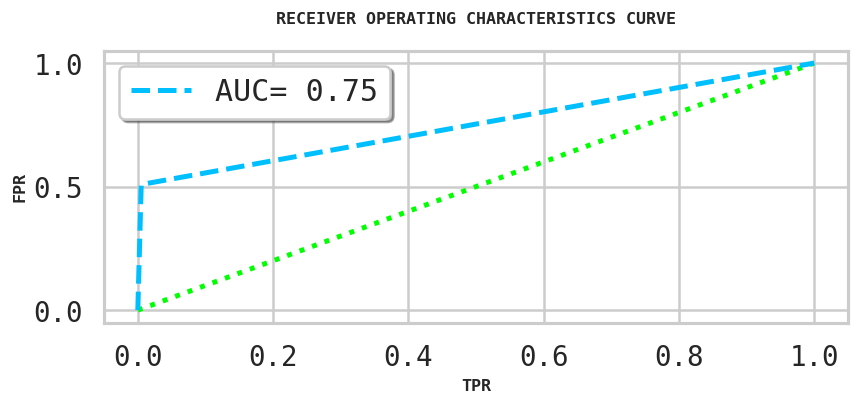





	____________________________________________CONFUSION MATRIX___________________________________________



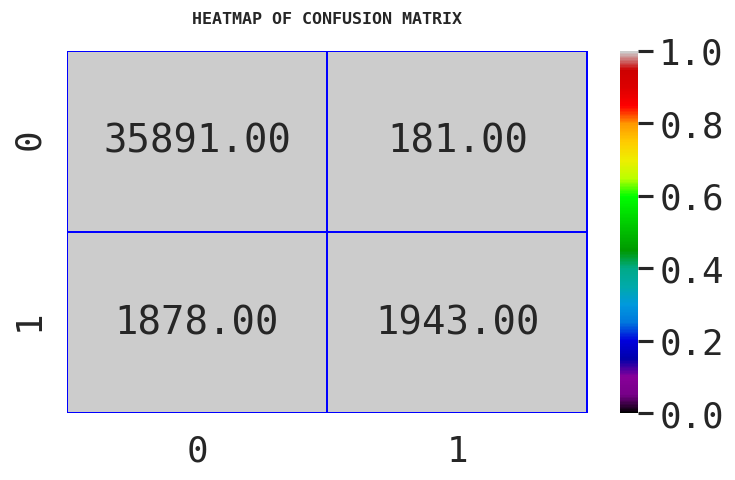



Processing highly_malignant
-------------------------------------
ACCURACY SCORE: 0.9898478429799714

F1 score: 0.321608040201005

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     39485
           1       0.51      0.24      0.32       408

    accuracy                           0.99     39893
   macro avg       0.75      0.62      0.66     39893
weighted avg       0.99      0.99      0.99     39893


PRECISION:
 0.5079365079365079

RECALL:
 0.23529411764705882

MEAN SQUARED ERROR:
 0.010152157020028576

ROOT MEAN SQ. ERROR:
 0.10075791294001964

LOG_LOSS: 0.3506449452911506

AUC_ROC Score:
 0.6164693964200851

TPR: [0.         0.00235532 1.        ] 
FPR: [0.         0.23529412 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



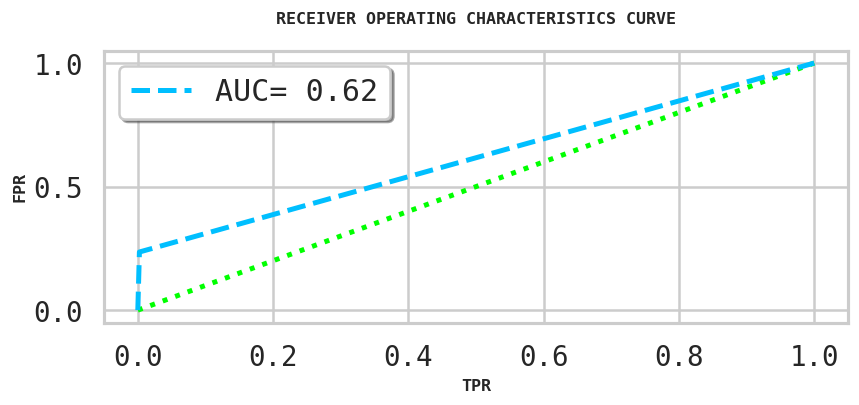





	____________________________________________CONFUSION MATRIX___________________________________________



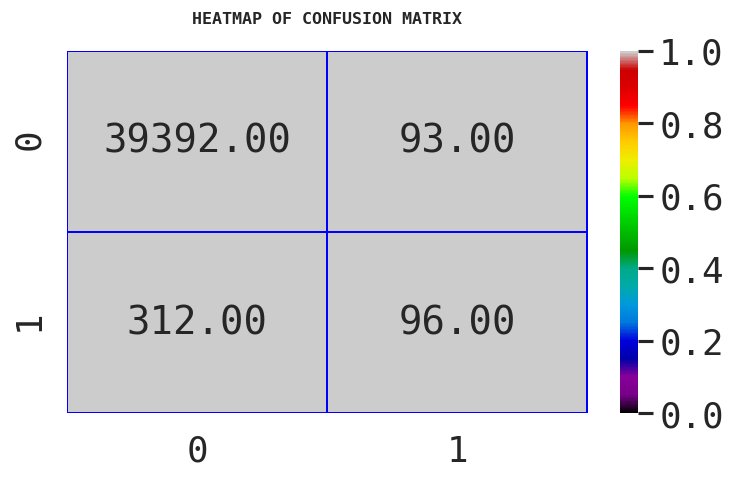



Processing rude
-------------------------------------
ACCURACY SCORE: 0.9721505025944401

F1 score: 0.6668665667166418

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     37815
           1       0.88      0.54      0.67      2078

    accuracy                           0.97     39893
   macro avg       0.93      0.77      0.83     39893
weighted avg       0.97      0.97      0.97     39893


PRECISION:
 0.8846459824980112

RECALL:
 0.5351299326275265

MEAN SQUARED ERROR:
 0.02784949740555987

ROOT MEAN SQ. ERROR:
 0.16688168684897656

LOG_LOSS: 0.9618904699163557

AUC_ROC Score:
 0.765647737700779

TPR: [0.         0.00383446 1.        ] 
FPR: [0.         0.53512993 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



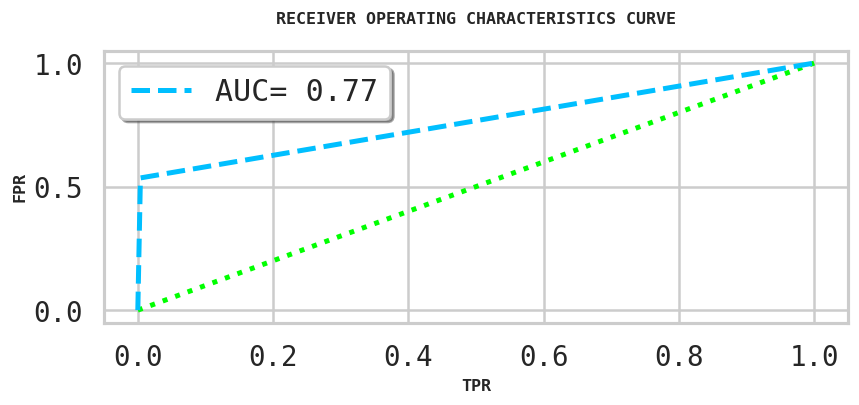





	____________________________________________CONFUSION MATRIX___________________________________________



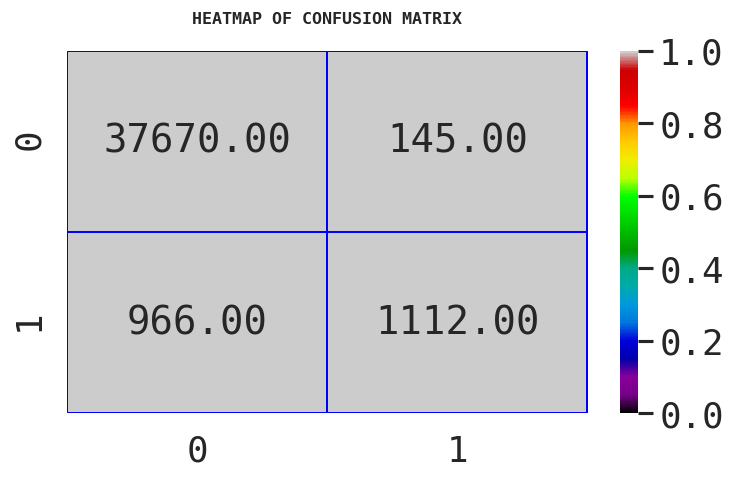



Processing threat
-------------------------------------
ACCURACY SCORE: 0.9953124608327275

F1 score: 0.010582010582010581

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39784
           1       0.01      0.01      0.01       109

    accuracy                           1.00     39893
   macro avg       0.50      0.50      0.50     39893
weighted avg       0.99      1.00      0.99     39893


PRECISION:
 0.0125

RECALL:
 0.009174311926605505

MEAN SQUARED ERROR:
 0.004687539167272454

ROOT MEAN SQ. ERROR:
 0.06846560572486345

LOG_LOSS: 0.1619034505814384

AUC_ROC Score:
 0.5035942945114628

TPR: [0.         0.00198572 1.        ] 
FPR: [0.         0.00917431 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



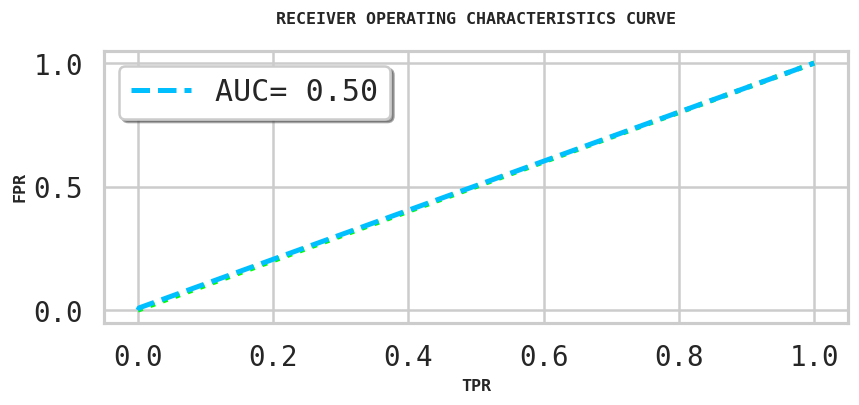





	____________________________________________CONFUSION MATRIX___________________________________________



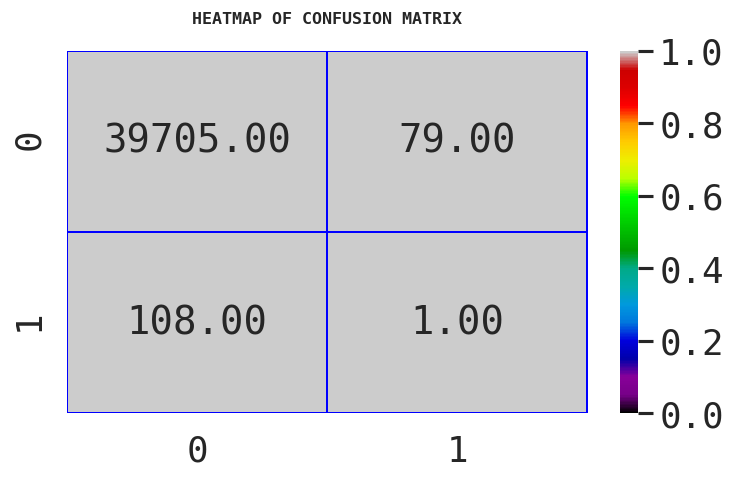



Processing abuse
-------------------------------------
ACCURACY SCORE: 0.9681397738951696

F1 score: 0.5847762169225744

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     37956
           1       0.80      0.46      0.58      1937

    accuracy                           0.97     39893
   macro avg       0.88      0.73      0.78     39893
weighted avg       0.96      0.97      0.96     39893


PRECISION:
 0.7962633451957295

RECALL:
 0.46205472379969026

MEAN SQUARED ERROR:
 0.03186022610483042

ROOT MEAN SQ. ERROR:
 0.17849433073582596

LOG_LOSS: 1.1004178152995017

AUC_ROC Score:
 0.7280107110409558

TPR: [0.        0.0060333 1.       ] 
FPR: [0.         0.46205472 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



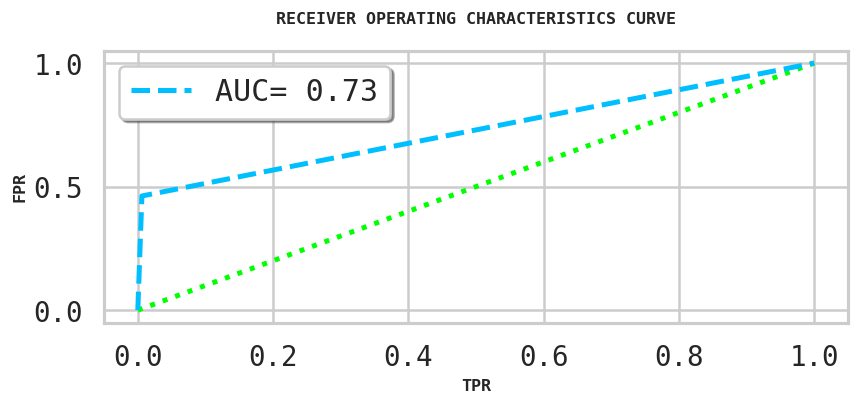





	____________________________________________CONFUSION MATRIX___________________________________________



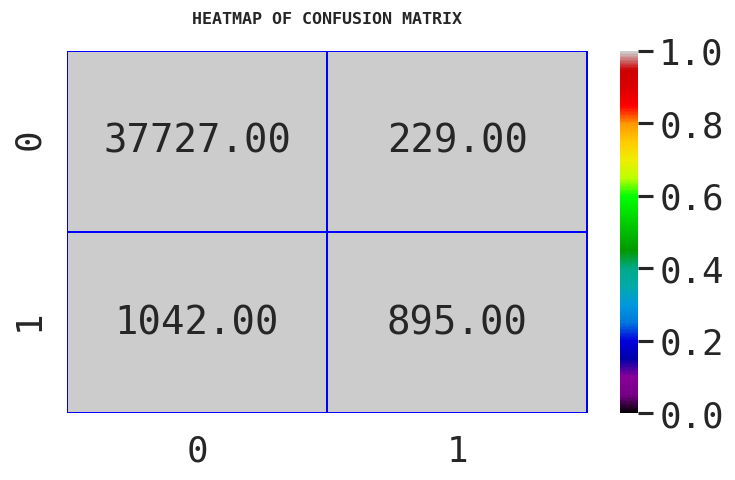



Processing loathe
-------------------------------------
ACCURACY SCORE: 0.9911262627528639

F1 score: 0.1015228426395939

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     39574
           1       0.27      0.06      0.10       319

    accuracy                           0.99     39893
   macro avg       0.63      0.53      0.55     39893
weighted avg       0.99      0.99      0.99     39893


PRECISION:
 0.26666666666666666

RECALL:
 0.06269592476489028

MEAN SQUARED ERROR:
 0.008873737247136089

ROOT MEAN SQ. ERROR:
 0.09420051617234425

LOG_LOSS: 0.30648912896139874

AUC_ROC Score:
 0.5306530616900713

TPR: [0.        0.0013898 1.       ] 
FPR: [0.         0.06269592 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



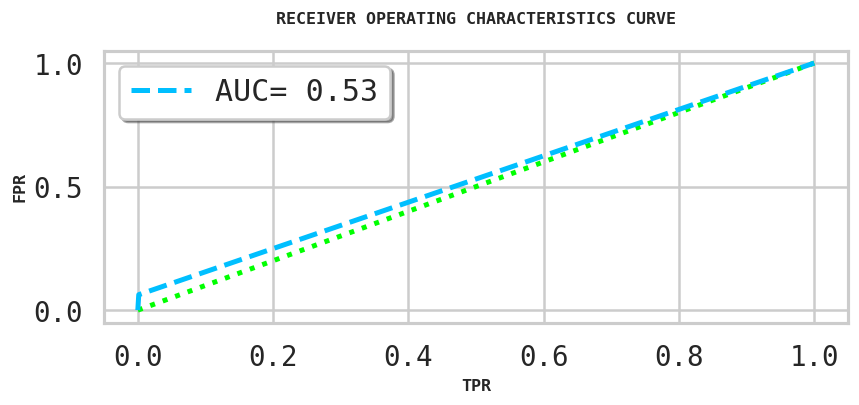





	____________________________________________CONFUSION MATRIX___________________________________________



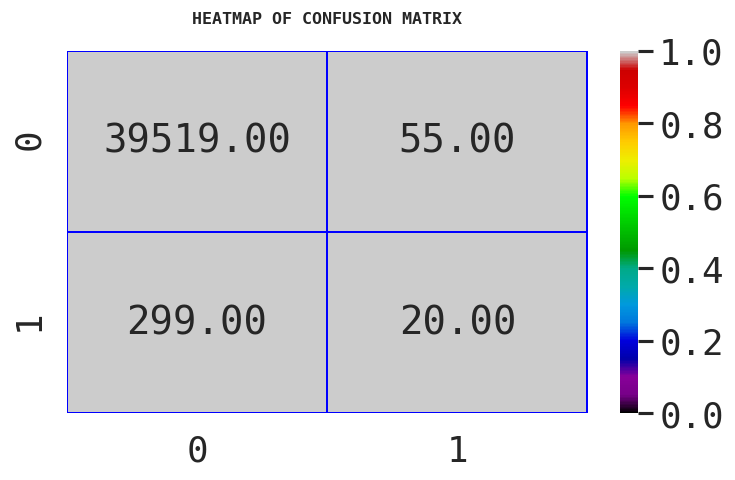



Processing normal
-------------------------------------
ACCURACY SCORE: 0.9461559672122929

F1 score: 0.9707627810747537

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.93      0.51      0.66      4067
           1       0.95      1.00      0.97     35826

    accuracy                           0.95     39893
   macro avg       0.94      0.75      0.82     39893
weighted avg       0.95      0.95      0.94     39893


PRECISION:
 0.9473460496254185

RECALL:
 0.9953664936079942

MEAN SQUARED ERROR:
 0.053844032787707115

ROOT MEAN SQ. ERROR:
 0.23204317009493539

LOG_LOSS: 1.85974673497543

AUC_ROC Score:
 0.7540146950459445

TPR: [0.        0.4873371 1.       ] 
FPR: [0.         0.99536649 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



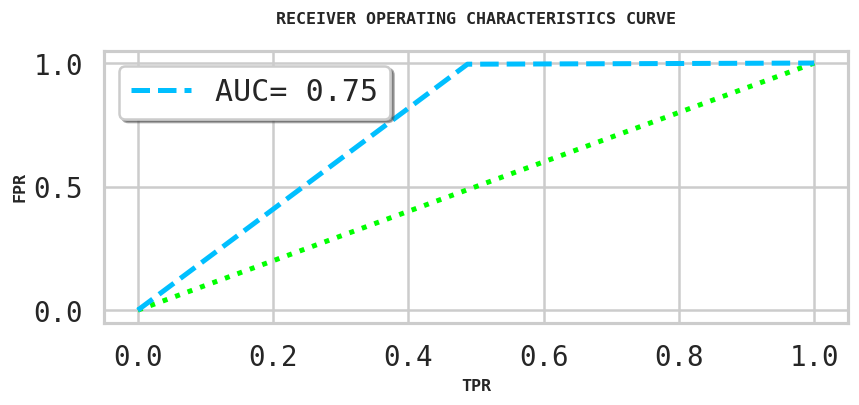





	____________________________________________CONFUSION MATRIX___________________________________________



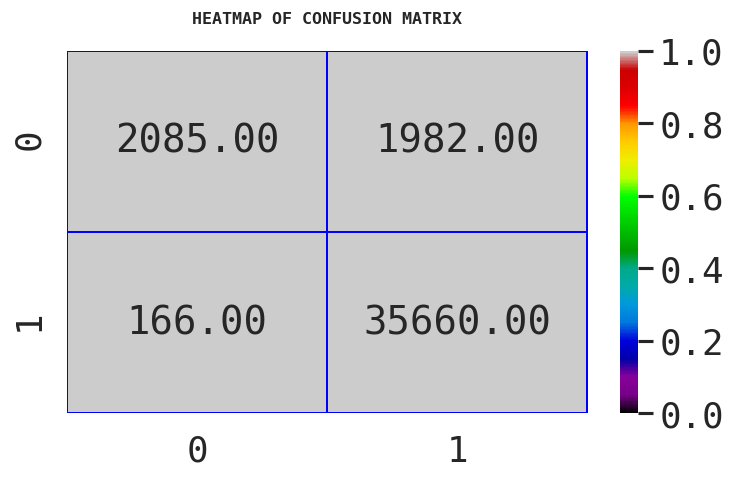

In [46]:
mnb_pipeline = Pipeline([('clf', OneVsRestClassifier(MultinomialNB(), n_jobs=1))])
F1=[]
ACCURACY = []
PRECESION = []
RECALL = []
RMSE = []
MSE = []
AUC=[]
TPR=[]
FPR=[]
CV_ACC=[]
LOG_LOSS=[]

for category in labels:
    print('Processing {}'.format(category))
    print('-------------------------------------')
    mnb_pipeline.fit(x_train, y_train[category])
    pred = mnb_pipeline.predict(x_test)
    f1=f1_score(pred,y_test[category])
    acc=accuracy_score(pred,y_test[category])
    clr=classification_report(y_test[category],pred)
    pre=precision_score(y_test[category],pred)
    rec=recall_score(y_test[category],pred)
    mse=mean_squared_error(y_test[category],pred)
    rmse=np.sqrt(mse)
    log = log_loss( y_test[category],pred)
    auc_scr=roc_auc_score(y_test[category],pred)
    tpr,fpr,threshold=roc_curve(y_test[category],pred)
    conf=confusion_matrix(y_test[category],pred)
        

    print('ACCURACY SCORE:', acc)
    print('\nF1 score:',f1)
    print('\nCLASSIFICATION REPORT:\n',clr)
    print('\nPRECISION:\n',pre)
    print('\nRECALL:\n',rec)
    print('\nMEAN SQUARED ERROR:\n',mse)
    print('\nROOT MEAN SQ. ERROR:\n',rmse)
    print('\nLOG_LOSS:',log)
    print('\nAUC_ROC Score:\n',auc_scr)
    print('\nTPR:',tpr,'\nFPR:',fpr)
    
    print('\n')
    #plotting the auc_roc curve
    print('\n\n\t____________________________________________ROC_AUC CURVE_______________________________________________')
    print()
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
    plt.figure(figsize=(8,3),dpi=120)
    plt.plot([0,1],[0,1],color='lime',linestyle=":",lw=3)
    plt.plot(tpr,fpr,label="AUC= %0.2f" % auc_scr,color='deepskyblue',lw=3,linestyle='--')
    plt.legend(fancybox=True,shadow=True, fontsize='medium')
    
    plt.xlabel("TPR",weight='bold',fontsize=10)
    plt.ylabel('FPR',weight='bold',fontsize=10)
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE\n',size=10,weight='bold',loc='center')
    plt.show()
    print('\n')
    #plotting confusion matrix
    print('\n\n\t____________________________________________CONFUSION MATRIX___________________________________________\n')
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
    plt.figure(figsize=(7,4),dpi=120)
    sns.heatmap(conf,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='nipy_spectral',linewidths=0.8, linecolor='blue')
    plt.title('HEATMAP OF CONFUSION MATRIX\n',size=10,weight='bold',loc='center')
    plt.show()
    print('\n')
    
    ACCURACY.append(acc)
    F1.append(f1)
    PRECESION.append(pre)
    RECALL.append(rec)
    RMSE.append(rmse)
    MSE.append(mse)
    AUC.append(auc_scr)
    TPR.append(tpr)
    FPR.append(fpr)
    LOG_LOSS.append(log)
    
#creating a dataframe to show the performance of the model

mnb_results = pd.DataFrame({"LABELS":labels,"F1":F1,'Acuracy':ACCURACY,'Precision': PRECESION ,'Recall': RECALL,
                               'RMSE':RMSE,'MSE':MSE,'AUC':AUC,'LOG_LOSS':LOG_LOSS})
                               
mnb_results.style.set_properties(**{'background-color':'midnightblue','color': 'lime','border-color': 'darkorange'})

### Bernoulli Navie Bayes

Processing malignant
-------------------------------------
ACCURACY SCORE: 0.6456270523650766

F1 score: 0.3239443355171919

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.98      0.62      0.76     36072
           1       0.20      0.89      0.32      3821

    accuracy                           0.65     39893
   macro avg       0.59      0.75      0.54     39893
weighted avg       0.91      0.65      0.72     39893


PRECISION:
 0.1981860737273259

RECALL:
 0.8864171682805548

MEAN SQUARED ERROR:
 0.35437294763492344

ROOT MEAN SQ. ERROR:
 0.5952923211624046

LOG_LOSS: 12.239882655564594

AUC_ROC Score:
 0.7532690188264606

TPR: [0.         0.37987913 1.        ] 
FPR: [0.         0.88641717 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



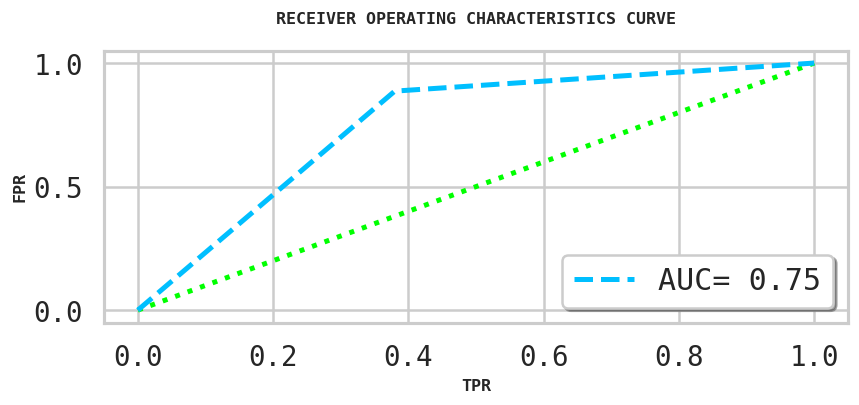





	____________________________________________CONFUSION MATRIX___________________________________________



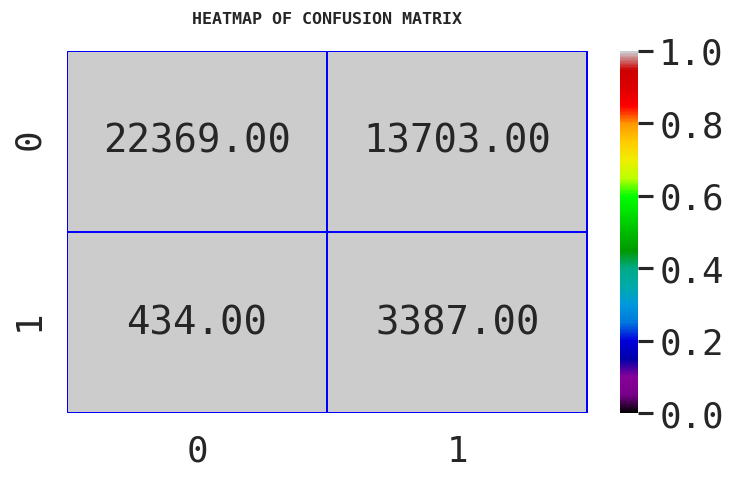



Processing highly_malignant
-------------------------------------
ACCURACY SCORE: 0.8169854360414108

F1 score: 0.09450576708421184

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       1.00      0.82      0.90     39485
           1       0.05      0.93      0.09       408

    accuracy                           0.82     39893
   macro avg       0.52      0.87      0.50     39893
weighted avg       0.99      0.82      0.89     39893


PRECISION:
 0.04977139124755062

RECALL:
 0.9338235294117647

MEAN SQUARED ERROR:
 0.18301456395858923

ROOT MEAN SQ. ERROR:
 0.42780201490711706

LOG_LOSS: 6.3212448983769125

AUC_ROC Score:
 0.8748008365052998

TPR: [0.         0.18422186 1.        ] 
FPR: [0.         0.93382353 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



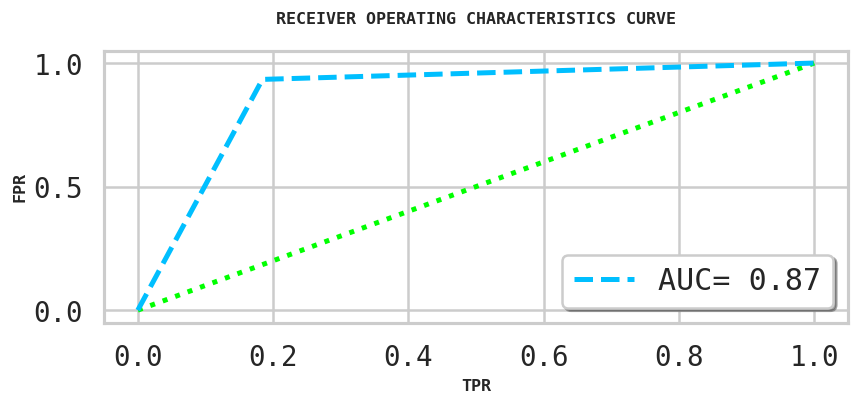





	____________________________________________CONFUSION MATRIX___________________________________________



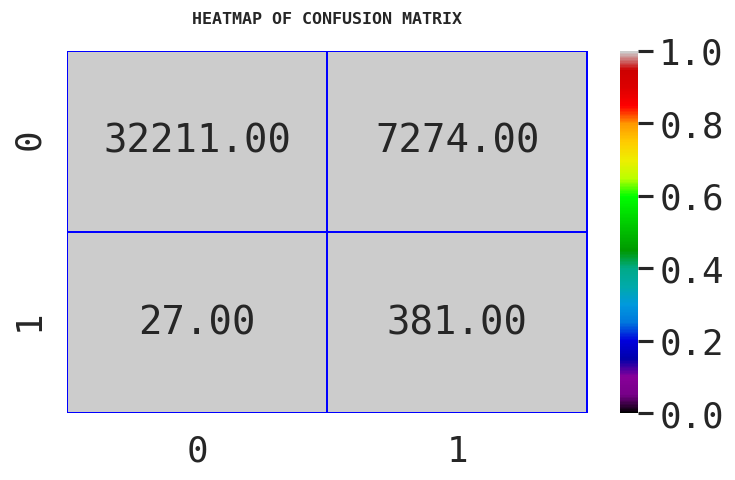



Processing rude
-------------------------------------
ACCURACY SCORE: 0.6784648935903542

F1 score: 0.22798675895275355

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      0.67      0.80     37815
           1       0.13      0.91      0.23      2078

    accuracy                           0.68     39893
   macro avg       0.56      0.79      0.51     39893
weighted avg       0.95      0.68      0.77     39893


PRECISION:
 0.1302882300337071

RECALL:
 0.9114533205004812

MEAN SQUARED ERROR:
 0.3215351064096458

ROOT MEAN SQ. ERROR:
 0.5670406567519174

LOG_LOSS: 11.105682554027757

AUC_ROC Score:
 0.7885575474643091

TPR: [0.         0.33433823 1.        ] 
FPR: [0.         0.91145332 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



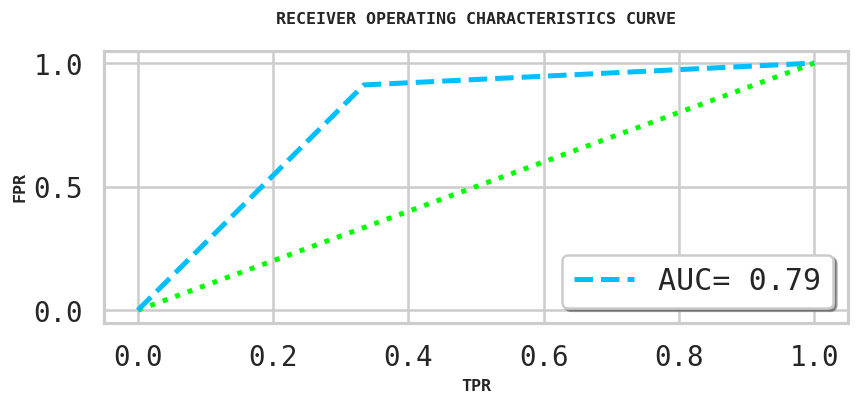





	____________________________________________CONFUSION MATRIX___________________________________________



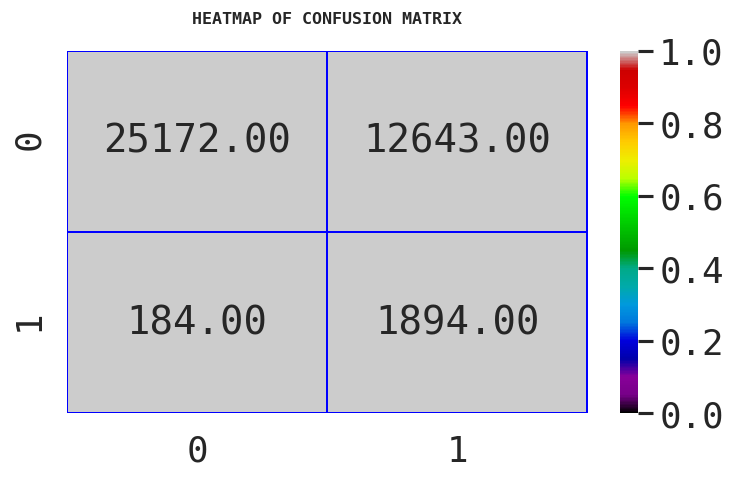



Processing threat
-------------------------------------
ACCURACY SCORE: 0.9857368460632191

F1 score: 0.15453194650817237

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     39784
           1       0.09      0.48      0.15       109

    accuracy                           0.99     39893
   macro avg       0.55      0.73      0.57     39893
weighted avg       1.00      0.99      0.99     39893


PRECISION:
 0.09219858156028368

RECALL:
 0.47706422018348627

MEAN SQUARED ERROR:
 0.01426315393678089

ROOT MEAN SQ. ERROR:
 0.11942844693280111

LOG_LOSS: 0.4926421468074217

AUC_ROC Score:
 0.7320973624545021

TPR: [0.        0.0128695 1.       ] 
FPR: [0.         0.47706422 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



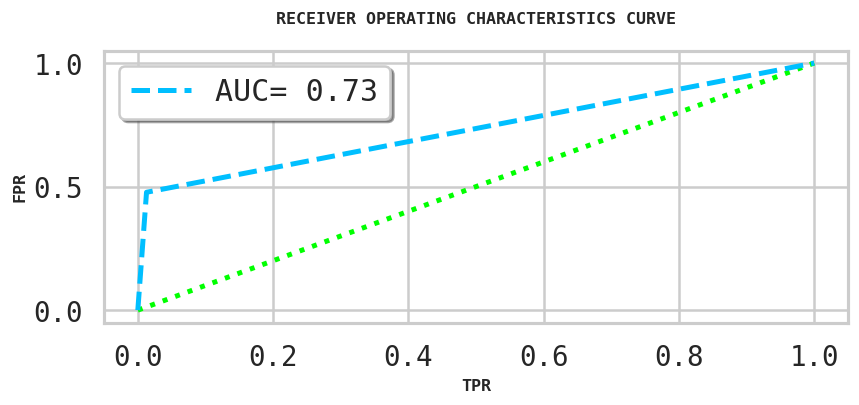





	____________________________________________CONFUSION MATRIX___________________________________________



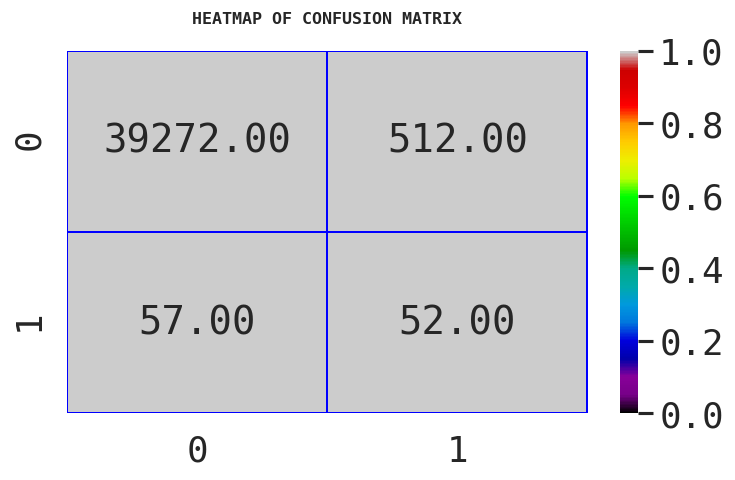



Processing abuse
-------------------------------------
ACCURACY SCORE: 0.6824004211265134

F1 score: 0.21538270993311867

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      0.67      0.80     37956
           1       0.12      0.90      0.22      1937

    accuracy                           0.68     39893
   macro avg       0.56      0.78      0.51     39893
weighted avg       0.95      0.68      0.77     39893


PRECISION:
 0.12236999507423826

RECALL:
 0.8977800722767165

MEAN SQUARED ERROR:
 0.31759957887348655

ROOT MEAN SQ. ERROR:
 0.5635597385135728

LOG_LOSS: 10.969750821012902

AUC_ROC Score:
 0.7845945360856658

TPR: [0.       0.328591 1.      ] 
FPR: [0.         0.89778007 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



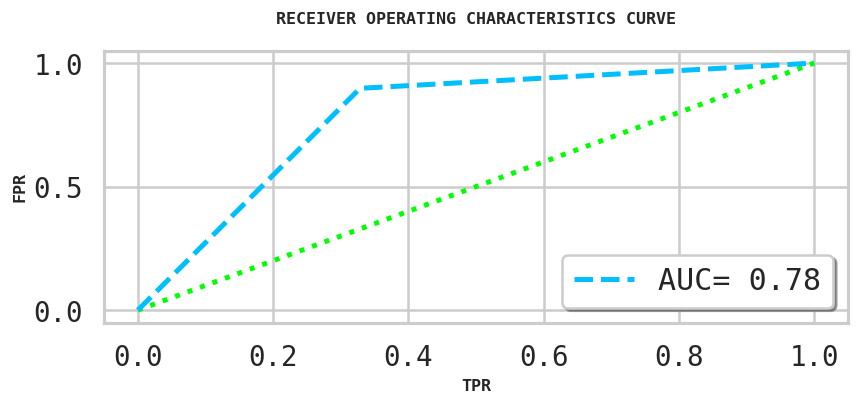





	____________________________________________CONFUSION MATRIX___________________________________________



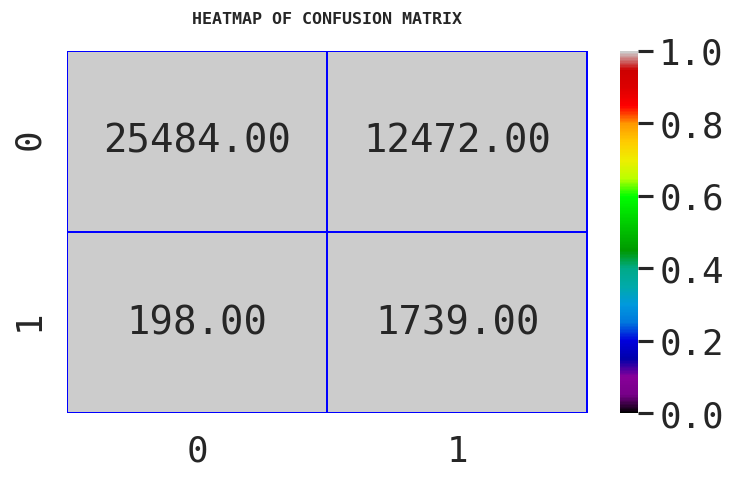



Processing loathe
-------------------------------------
ACCURACY SCORE: 0.8713308099165267

F1 score: 0.09709762532981532

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93     39574
           1       0.05      0.87      0.10       319

    accuracy                           0.87     39893
   macro avg       0.53      0.87      0.51     39893
weighted avg       0.99      0.87      0.92     39893


PRECISION:
 0.05143496086470369

RECALL:
 0.8652037617554859

MEAN SQUARED ERROR:
 0.1286691900834733

ROOT MEAN SQ. ERROR:
 0.3587048788119187

LOG_LOSS: 4.444178406888333

AUC_ROC Score:
 0.8682919804380603

TPR: [0.        0.1286198 1.       ] 
FPR: [0.         0.86520376 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



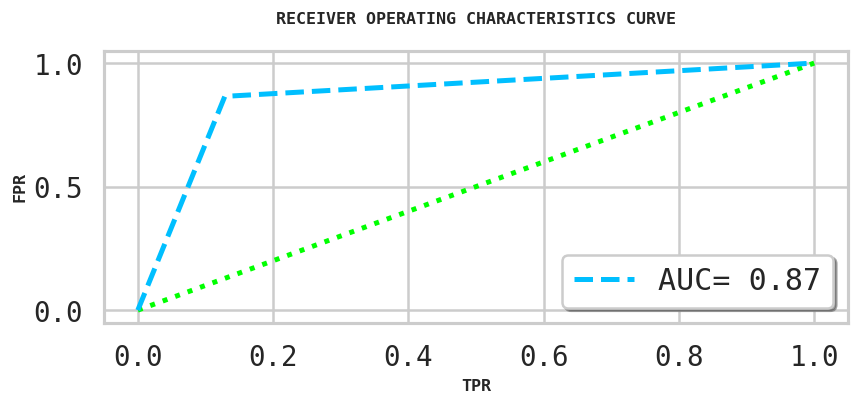





	____________________________________________CONFUSION MATRIX___________________________________________



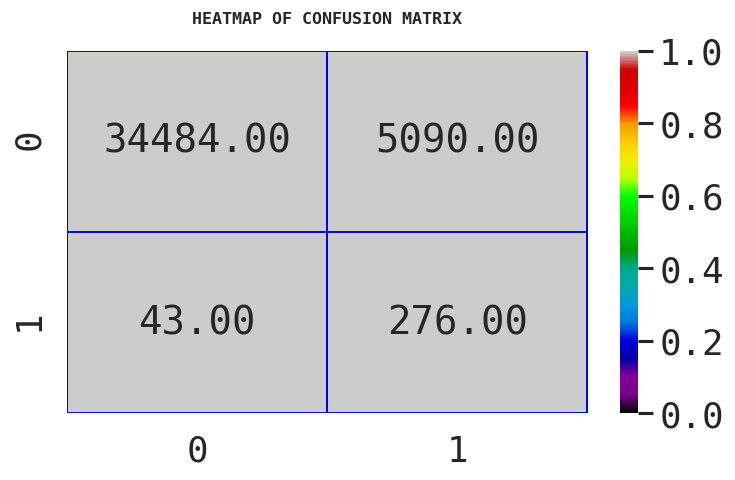



Processing normal
-------------------------------------
ACCURACY SCORE: 0.6428696763843281

F1 score: 0.7557056876832592

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.21      0.89      0.34      4067
           1       0.98      0.62      0.76     35826

    accuracy                           0.64     39893
   macro avg       0.59      0.75      0.55     39893
weighted avg       0.90      0.64      0.71     39893


PRECISION:
 0.9796825679100164

RECALL:
 0.6150840171942165

MEAN SQUARED ERROR:
 0.35713032361567193

ROOT MEAN SQ. ERROR:
 0.5976038182740067

LOG_LOSS: 12.334853551107166

AUC_ROC Score:
 0.7513580892462354

TPR: [0.         0.11236784 1.        ] 
FPR: [0.         0.61508402 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



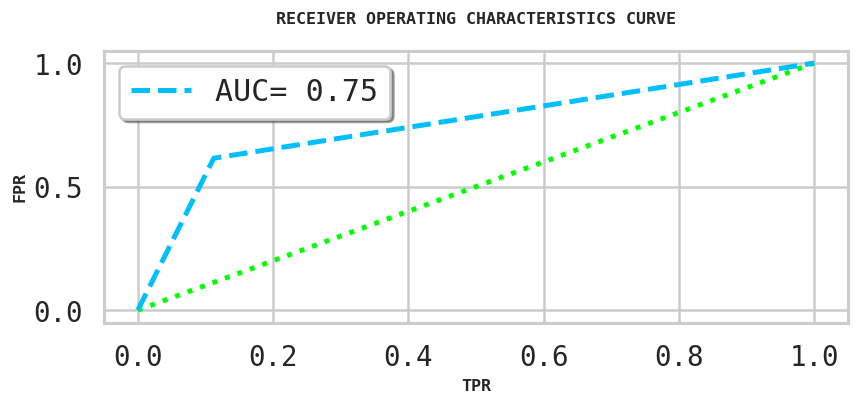





	____________________________________________CONFUSION MATRIX___________________________________________



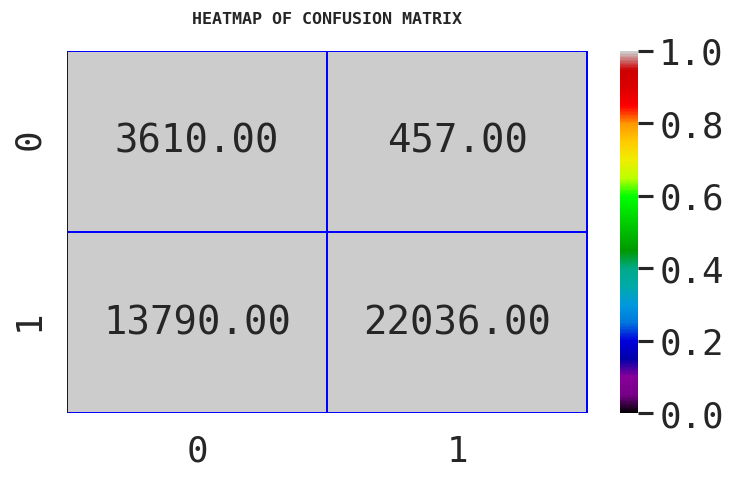

In [47]:
bnb_pipeline = Pipeline([('clf', OneVsRestClassifier(BernoulliNB(), n_jobs=1))])
F1=[]
ACCURACY = []
PRECESION = []
RECALL = []
RMSE = []
MSE = []
AUC=[]
TPR=[]
FPR=[]
CV_ACC=[]
LOG_LOSS=[]

for category in labels:
    print('Processing {}'.format(category))
    print('-------------------------------------')
    bnb_pipeline.fit(x_train, y_train[category])
    pred = bnb_pipeline.predict(x_test)
    f1=f1_score(pred,y_test[category])
    acc=accuracy_score(pred,y_test[category])
    clr=classification_report(y_test[category],pred)
    pre=precision_score(y_test[category],pred)
    rec=recall_score(y_test[category],pred)
    mse=mean_squared_error(y_test[category],pred)
    rmse=np.sqrt(mse)
    log = log_loss( y_test[category],pred)
    auc_scr=roc_auc_score(y_test[category],pred)
    tpr,fpr,threshold=roc_curve(y_test[category],pred)
    conf=confusion_matrix(y_test[category],pred)
        

    print('ACCURACY SCORE:', acc)
    print('\nF1 score:',f1)
    print('\nCLASSIFICATION REPORT:\n',clr)
    print('\nPRECISION:\n',pre)
    print('\nRECALL:\n',rec)
    print('\nMEAN SQUARED ERROR:\n',mse)
    print('\nROOT MEAN SQ. ERROR:\n',rmse)
    print('\nLOG_LOSS:',log)
    print('\nAUC_ROC Score:\n',auc_scr)
    print('\nTPR:',tpr,'\nFPR:',fpr)
    
    print('\n')
    #plotting the auc_roc curve
    print('\n\n\t____________________________________________ROC_AUC CURVE_______________________________________________')
    print()
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
    plt.figure(figsize=(8,3),dpi=120)
    plt.plot([0,1],[0,1],color='lime',linestyle=":",lw=3)
    plt.plot(tpr,fpr,label="AUC= %0.2f" % auc_scr,color='deepskyblue',lw=3,linestyle='--')
    plt.legend(fancybox=True,shadow=True, fontsize='medium')
    
    plt.xlabel("TPR",weight='bold',fontsize=10)
    plt.ylabel('FPR',weight='bold',fontsize=10)
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE\n',size=10,weight='bold',loc='center')
    plt.show()
    print('\n')
    #plotting confusion matrix
    print('\n\n\t____________________________________________CONFUSION MATRIX___________________________________________\n')
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
    plt.figure(figsize=(7,4),dpi=120)
    sns.heatmap(conf,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='nipy_spectral',linewidths=0.8, linecolor='blue')
    plt.title('HEATMAP OF CONFUSION MATRIX\n',size=10,weight='bold',loc='center')
    plt.show()
    print('\n')
    
    ACCURACY.append(acc)
    F1.append(f1)
    PRECESION.append(pre)
    RECALL.append(rec)
    RMSE.append(rmse)
    MSE.append(mse)
    AUC.append(auc_scr)
    TPR.append(tpr)
    FPR.append(fpr)
    LOG_LOSS.append(log)
    
#creating a dataframe to show the performance of the model
bnb_results = pd.DataFrame({"LABELS":labels,"F1":F1,'Acuracy':ACCURACY,'Precision': PRECESION ,'Recall': RECALL,
                               'RMSE':RMSE,'MSE':MSE,'AUC':AUC,'LOG_LOSS':LOG_LOSS})
                               
bnb_results.style.set_properties(**{'background-color':'midnightblue','color': 'lime','border-color': 'darkorange'})

### Linear SVC

Processing malignant
-------------------------------------
ACCURACY SCORE: 0.9561075877973579

F1 score: 0.7343346988317402

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     36072
           1       0.87      0.63      0.73      3821

    accuracy                           0.96     39893
   macro avg       0.92      0.81      0.86     39893
weighted avg       0.95      0.96      0.95     39893


PRECISION:
 0.8736462093862816

RECALL:
 0.6333420570531274

MEAN SQUARED ERROR:
 0.04389241220264207

ROOT MEAN SQ. ERROR:
 0.20950516032461364

LOG_LOSS: 1.5159972257435943

AUC_ROC Score:
 0.8118196202320416

TPR: [0.         0.00970282 1.        ] 
FPR: [0.         0.63334206 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



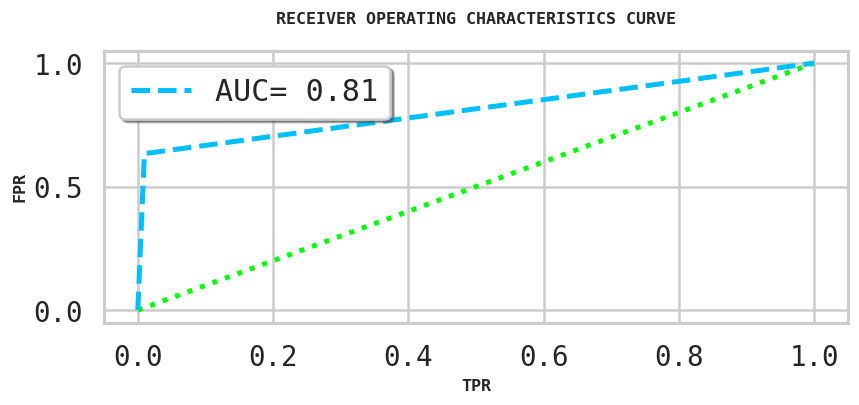





	____________________________________________CONFUSION MATRIX___________________________________________



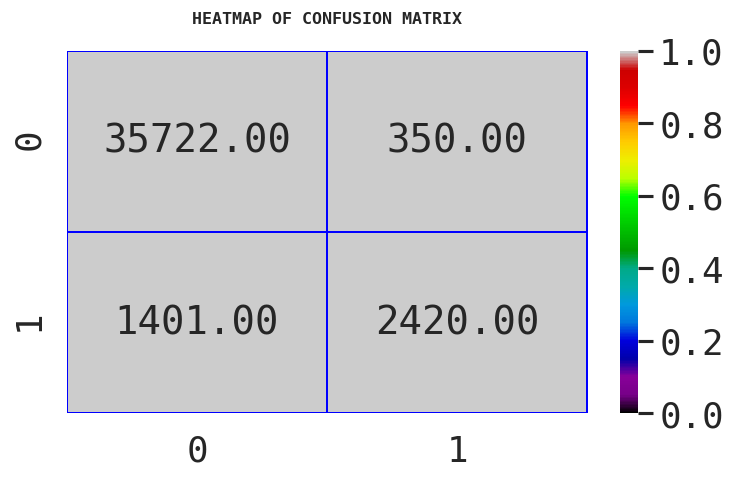



Processing highly_malignant
-------------------------------------
ACCURACY SCORE: 0.9905497205023438

F1 score: 0.29532710280373836

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     39485
           1       0.62      0.19      0.30       408

    accuracy                           0.99     39893
   macro avg       0.81      0.60      0.65     39893
weighted avg       0.99      0.99      0.99     39893


PRECISION:
 0.6220472440944882

RECALL:
 0.19362745098039216

MEAN SQUARED ERROR:
 0.009450279497656231

ROOT MEAN SQ. ERROR:
 0.09721254804631052

LOG_LOSS: 0.3264020525294667

AUC_ROC Score:
 0.5962058997335796

TPR: [0.         0.00121565 1.        ] 
FPR: [0.         0.19362745 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



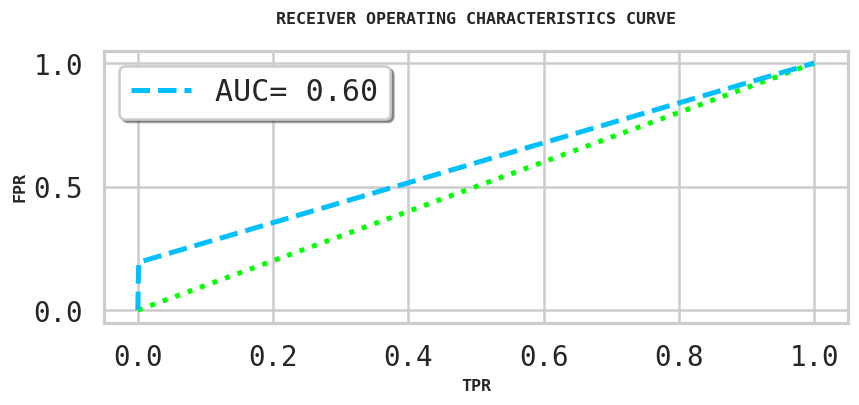





	____________________________________________CONFUSION MATRIX___________________________________________



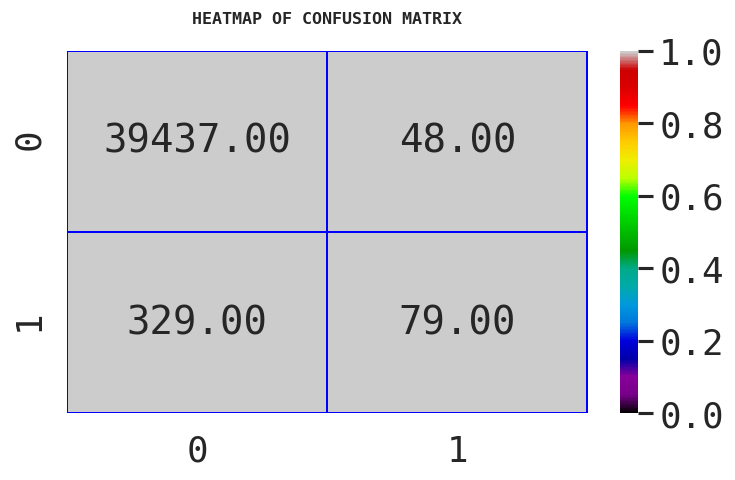



Processing rude
-------------------------------------
ACCURACY SCORE: 0.9789436743288297

F1 score: 0.7714907508161045

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     37815
           1       0.89      0.68      0.77      2078

    accuracy                           0.98     39893
   macro avg       0.94      0.84      0.88     39893
weighted avg       0.98      0.98      0.98     39893


PRECISION:
 0.8873591989987485

RECALL:
 0.6823869104908566

MEAN SQUARED ERROR:
 0.02105632567117038

ROOT MEAN SQ. ERROR:
 0.14510797935044917

LOG_LOSS: 0.7272633318943785

AUC_ROC Score:
 0.8388134473120685

TPR: [0.         0.00476002 1.        ] 
FPR: [0.         0.68238691 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



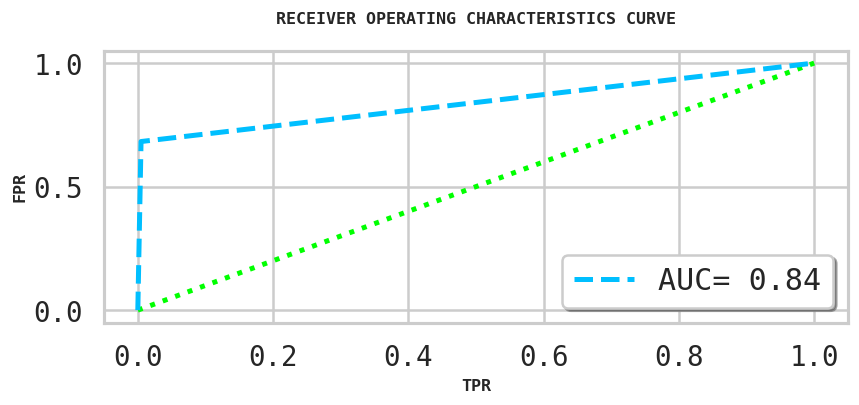





	____________________________________________CONFUSION MATRIX___________________________________________



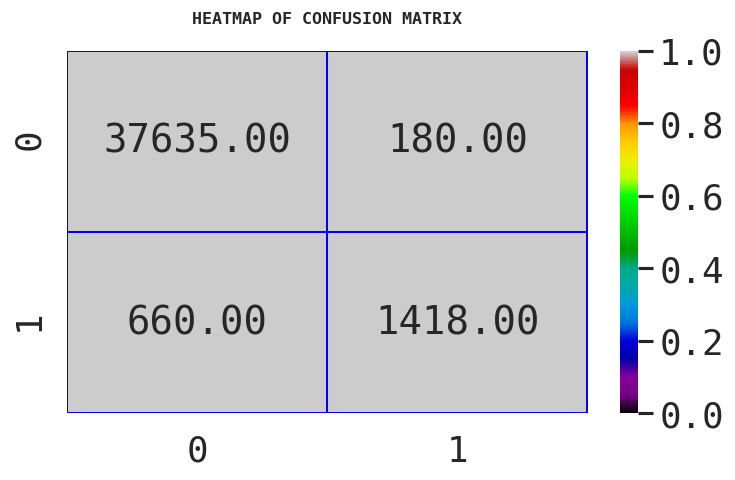



Processing threat
-------------------------------------
ACCURACY SCORE: 0.9975684957260672

F1 score: 0.36601307189542487

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39784
           1       0.64      0.26      0.37       109

    accuracy                           1.00     39893
   macro avg       0.82      0.63      0.68     39893
weighted avg       1.00      1.00      1.00     39893


PRECISION:
 0.6363636363636364

RECALL:
 0.25688073394495414

MEAN SQUARED ERROR:
 0.0024315042739327703

ROOT MEAN SQ. ERROR:
 0.049310285680908096

LOG_LOSS: 0.0839815031174707

AUC_ROC Score:
 0.6282392811088132

TPR: [0.00000000e+00 4.02171727e-04 1.00000000e+00] 
FPR: [0.         0.25688073 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



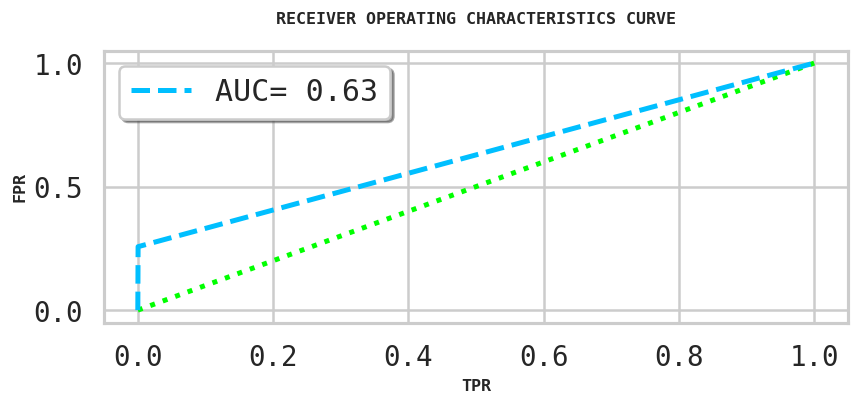





	____________________________________________CONFUSION MATRIX___________________________________________



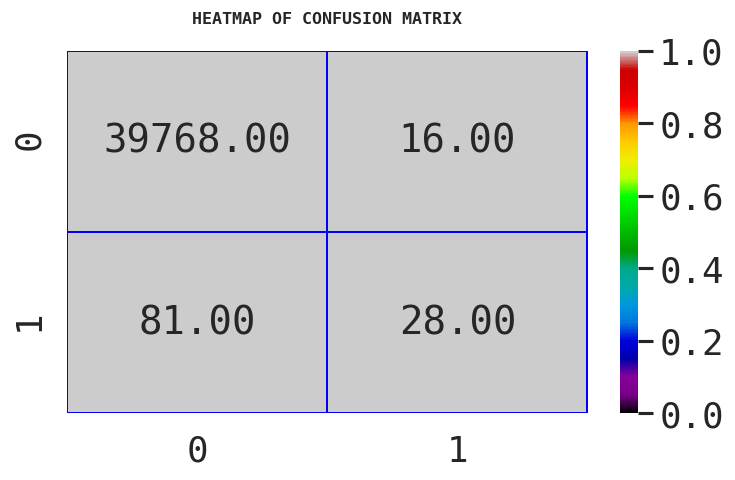



Processing abuse
-------------------------------------
ACCURACY SCORE: 0.970721680495325

F1 score: 0.6452004860267315

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     37956
           1       0.78      0.55      0.65      1937

    accuracy                           0.97     39893
   macro avg       0.88      0.77      0.81     39893
weighted avg       0.97      0.97      0.97     39893


PRECISION:
 0.7837638376383764

RECALL:
 0.5482705214248839

MEAN SQUARED ERROR:
 0.029278319504675007

ROOT MEAN SQ. ERROR:
 0.1711090865637328

LOG_LOSS: 1.0112432033515344

AUC_ROC Score:
 0.7702755283908064

TPR: [0.         0.00771946 1.        ] 
FPR: [0.         0.54827052 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



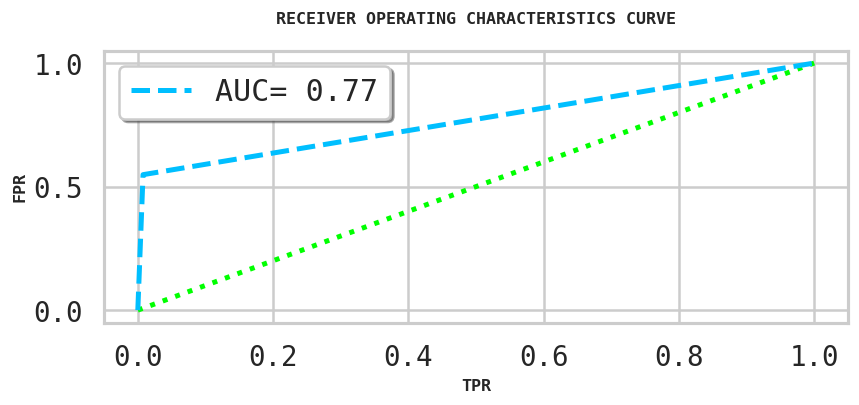





	____________________________________________CONFUSION MATRIX___________________________________________



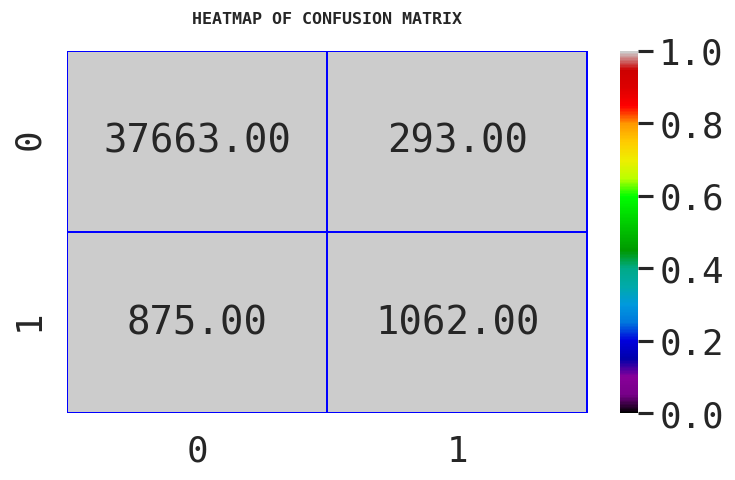



Processing loathe
-------------------------------------
ACCURACY SCORE: 0.9925550848519791

F1 score: 0.3044496487119438

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     39574
           1       0.60      0.20      0.30       319

    accuracy                           0.99     39893
   macro avg       0.80      0.60      0.65     39893
weighted avg       0.99      0.99      0.99     39893


PRECISION:
 0.6018518518518519

RECALL:
 0.20376175548589343

MEAN SQUARED ERROR:
 0.0074449151480209565

ROOT MEAN SQ. ERROR:
 0.08628392172369634

LOG_LOSS: 0.25713912144932716

AUC_ROC Score:
 0.6013375917470909

TPR: [0.         0.00108657 1.        ] 
FPR: [0.         0.20376176 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



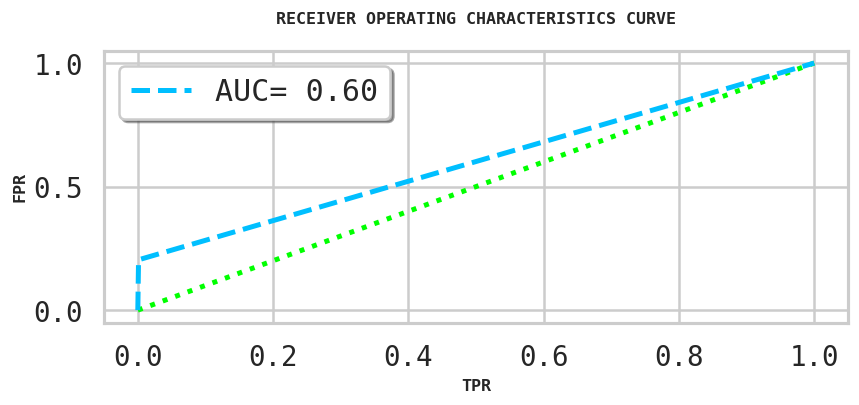





	____________________________________________CONFUSION MATRIX___________________________________________



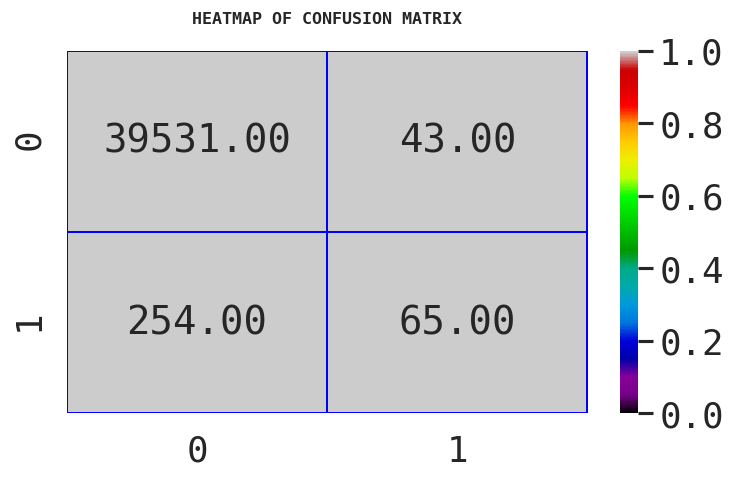



Processing normal
-------------------------------------
ACCURACY SCORE: 0.9559070513623944

F1 score: 0.9758189791457597

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.89      0.65      0.75      4067
           1       0.96      0.99      0.98     35826

    accuracy                           0.96     39893
   macro avg       0.92      0.82      0.86     39893
weighted avg       0.95      0.96      0.95     39893


PRECISION:
 0.9613998970663922

RECALL:
 0.9906771618377714

MEAN SQUARED ERROR:
 0.04409294863760559

ROOT MEAN SQ. ERROR:
 0.2099832103707475

LOG_LOSS: 1.5229450556485085

AUC_ROC Score:
 0.8201480227679145

TPR: [0.         0.35038112 1.        ] 
FPR: [0.         0.99067716 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



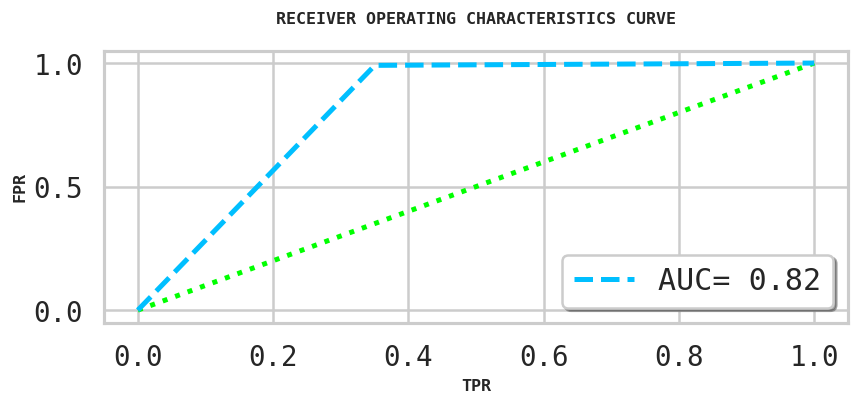





	____________________________________________CONFUSION MATRIX___________________________________________



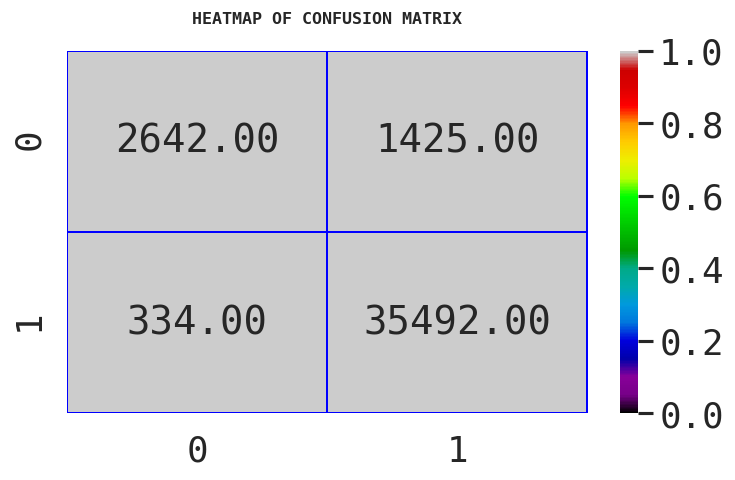

In [48]:
lvsc_pipeline = Pipeline([('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1))])
F1=[]
ACCURACY = []
PRECESION = []
RECALL = []
RMSE = []
MSE = []
AUC=[]
TPR=[]
FPR=[]
CV_ACC=[]
LOG_LOSS=[]

for category in labels:
    print('Processing {}'.format(category))
    print('-------------------------------------')
    lvsc_pipeline.fit(x_train, y_train[category])
    pred = lvsc_pipeline.predict(x_test)
    f1=f1_score(pred,y_test[category])
    acc=accuracy_score(pred,y_test[category])
    clr=classification_report(y_test[category],pred)
    pre=precision_score(y_test[category],pred)
    rec=recall_score(y_test[category],pred)
    mse=mean_squared_error(y_test[category],pred)
    rmse=np.sqrt(mse)
    log = log_loss( y_test[category],pred)
    auc_scr=roc_auc_score(y_test[category],pred)
    tpr,fpr,threshold=roc_curve(y_test[category],pred)
    conf=confusion_matrix(y_test[category],pred)
        

    print('ACCURACY SCORE:', acc)
    print('\nF1 score:',f1)
    print('\nCLASSIFICATION REPORT:\n',clr)
    print('\nPRECISION:\n',pre)
    print('\nRECALL:\n',rec)
    print('\nMEAN SQUARED ERROR:\n',mse)
    print('\nROOT MEAN SQ. ERROR:\n',rmse)
    print('\nLOG_LOSS:',log)
    print('\nAUC_ROC Score:\n',auc_scr)
    print('\nTPR:',tpr,'\nFPR:',fpr)
    
    print('\n')
    #plotting the auc_roc curve
    print('\n\n\t____________________________________________ROC_AUC CURVE_______________________________________________')
    print()
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
    plt.figure(figsize=(8,3),dpi=120)
    plt.plot([0,1],[0,1],color='lime',linestyle=":",lw=3)
    plt.plot(tpr,fpr,label="AUC= %0.2f" % auc_scr,color='deepskyblue',lw=3,linestyle='--')
    plt.legend(fancybox=True,shadow=True, fontsize='medium')
    
    plt.xlabel("TPR",weight='bold',fontsize=10)
    plt.ylabel('FPR',weight='bold',fontsize=10)
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE\n',size=10,weight='bold',loc='center')
    plt.show()
    print('\n')
    #plotting confusion matrix
    print('\n\n\t____________________________________________CONFUSION MATRIX___________________________________________\n')
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
    plt.figure(figsize=(7,4),dpi=120)
    sns.heatmap(conf,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='nipy_spectral',linewidths=0.8, linecolor='blue')
    plt.title('HEATMAP OF CONFUSION MATRIX\n',size=10,weight='bold',loc='center')
    plt.show()
    print('\n')
    
    ACCURACY.append(acc)
    F1.append(f1)
    PRECESION.append(pre)
    RECALL.append(rec)
    RMSE.append(rmse)
    MSE.append(mse)
    AUC.append(auc_scr)
    TPR.append(tpr)
    FPR.append(fpr)
    LOG_LOSS.append(log)
    
#creating a dataframe to show the performance of the model

lsvc_results = pd.DataFrame({"LABELS":labels,"F1":F1,'Acuracy':ACCURACY,'Precision': PRECESION ,'Recall': RECALL,
                               'RMSE':RMSE,'MSE':MSE,'AUC':AUC,'LOG_LOSS':LOG_LOSS})
                               
lsvc_results.style.set_properties(**{'background-color':'midnightblue','color': 'lime','border-color': 'darkorange'})

### Random Forest Classifier

Processing malignant
-------------------------------------
ACCURACY SCORE: 0.9535507482515729

F1 score: 0.7267364695472643

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     36072
           1       0.83      0.64      0.73      3821

    accuracy                           0.95     39893
   macro avg       0.90      0.82      0.85     39893
weighted avg       0.95      0.95      0.95     39893


PRECISION:
 0.8324324324324325

RECALL:
 0.6448573671813661

MEAN SQUARED ERROR:
 0.04644925174842704

ROOT MEAN SQ. ERROR:
 0.21552088471521047

LOG_LOSS: 1.6043102614517561

AUC_ROC Score:
 0.8155535449790176

TPR: [0.         0.01375028 1.        ] 
FPR: [0.         0.64485737 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



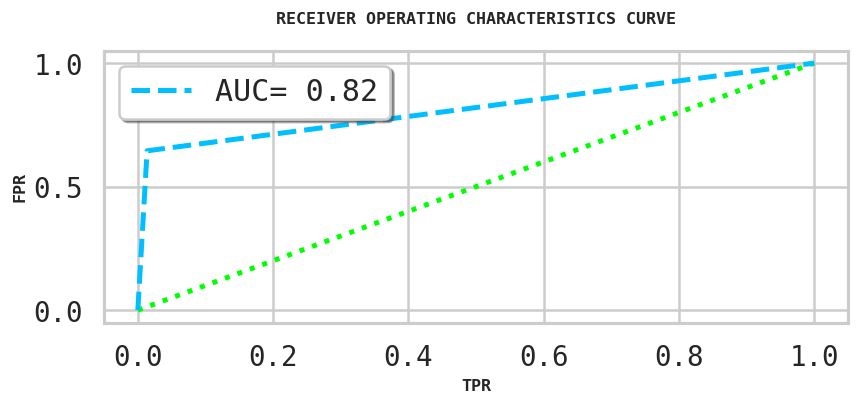





	____________________________________________CONFUSION MATRIX___________________________________________



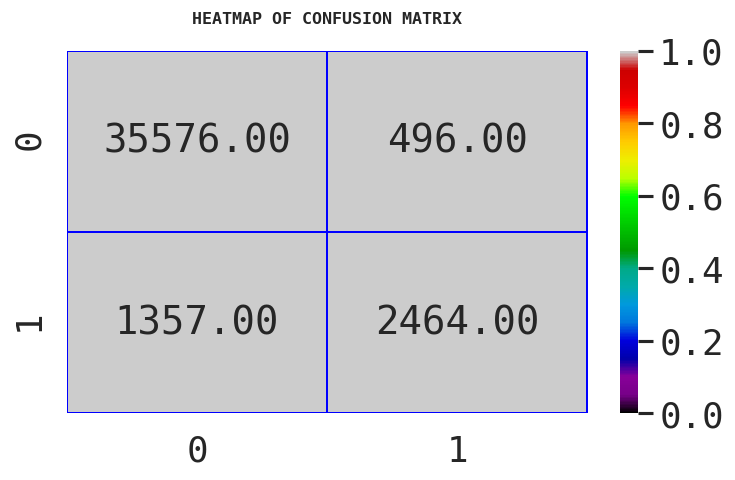



Processing highly_malignant
-------------------------------------
ACCURACY SCORE: 0.9898729100343419

F1 score: 0.1721311475409836

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     39485
           1       0.53      0.10      0.17       408

    accuracy                           0.99     39893
   macro avg       0.76      0.55      0.58     39893
weighted avg       0.99      0.99      0.99     39893


PRECISION:
 0.525

RECALL:
 0.10294117647058823

MEAN SQUARED ERROR:
 0.010127089965658136

ROOT MEAN SQ. ERROR:
 0.10063344357448042

LOG_LOSS: 0.34977805750999674

AUC_ROC Score:
 0.5509893928446395

TPR: [0.00000000e+00 9.62390781e-04 1.00000000e+00] 
FPR: [0.         0.10294118 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



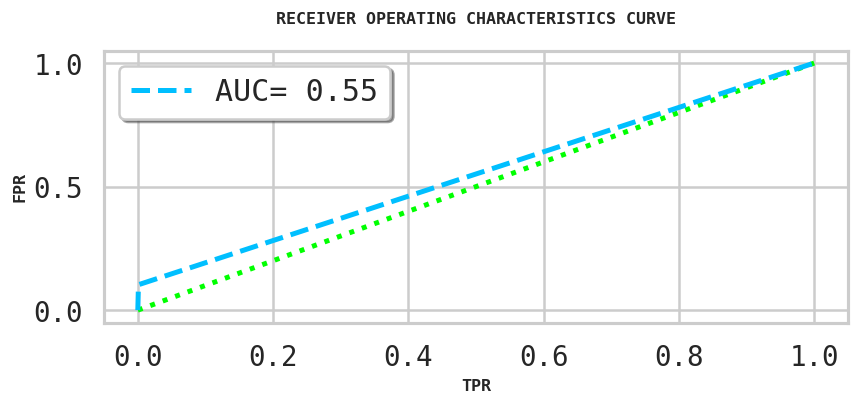





	____________________________________________CONFUSION MATRIX___________________________________________



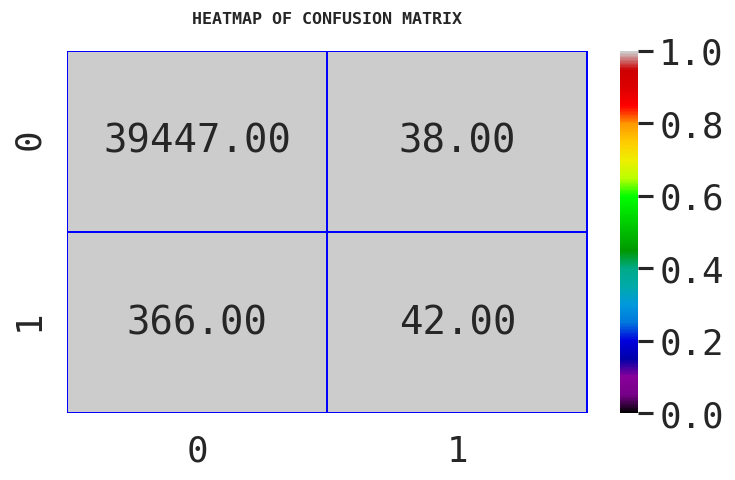



Processing rude
-------------------------------------
ACCURACY SCORE: 0.9793447471987566

F1 score: 0.7870801033591732

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     37815
           1       0.85      0.73      0.79      2078

    accuracy                           0.98     39893
   macro avg       0.92      0.86      0.89     39893
weighted avg       0.98      0.98      0.98     39893


PRECISION:
 0.8498883928571429

RECALL:
 0.7329162656400385

MEAN SQUARED ERROR:
 0.020655252801243328

ROOT MEAN SQ. ERROR:
 0.14371935430290286

LOG_LOSS: 0.7134125495980538

AUC_ROC Score:
 0.862901343186276

TPR: [0.         0.00711358 1.        ] 
FPR: [0.         0.73291627 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



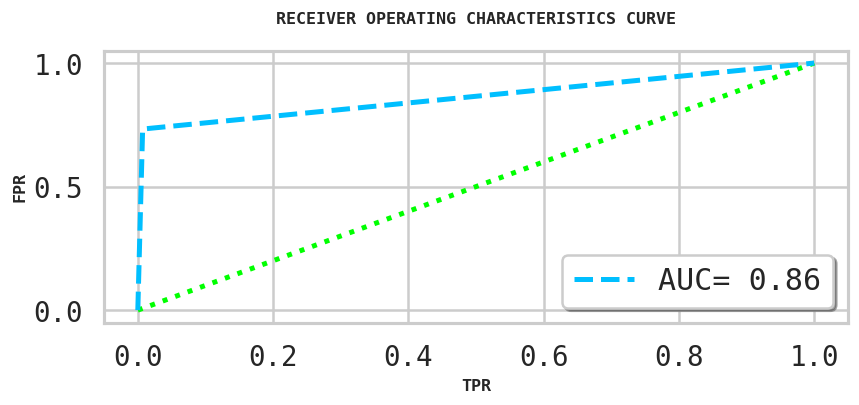





	____________________________________________CONFUSION MATRIX___________________________________________



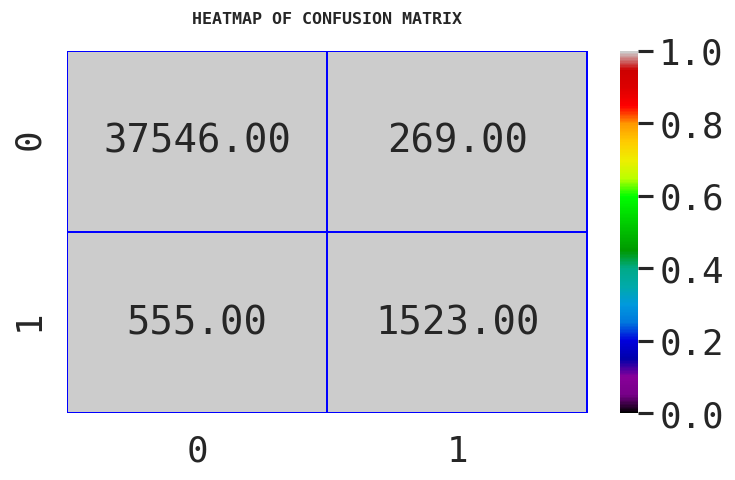



Processing threat
-------------------------------------
ACCURACY SCORE: 0.9973428922367332

F1 score: 0.14516129032258066

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     39784
           1       0.60      0.08      0.15       109

    accuracy                           1.00     39893
   macro avg       0.80      0.54      0.57     39893
weighted avg       1.00      1.00      1.00     39893


PRECISION:
 0.6

RECALL:
 0.08256880733944955

MEAN SQUARED ERROR:
 0.0026571077632667386

ROOT MEAN SQ. ERROR:
 0.05154714117452818

LOG_LOSS: 0.09177337115396568

AUC_ROC Score:
 0.5412089964708507

TPR: [0.00000000e+00 1.50814398e-04 1.00000000e+00] 
FPR: [0.         0.08256881 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



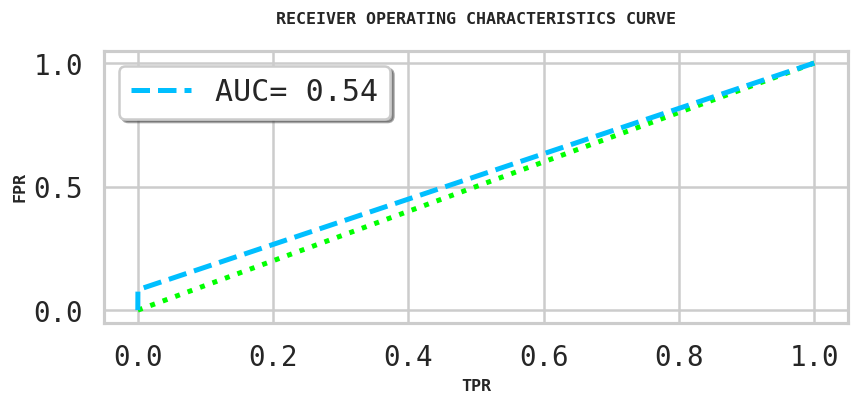





	____________________________________________CONFUSION MATRIX___________________________________________



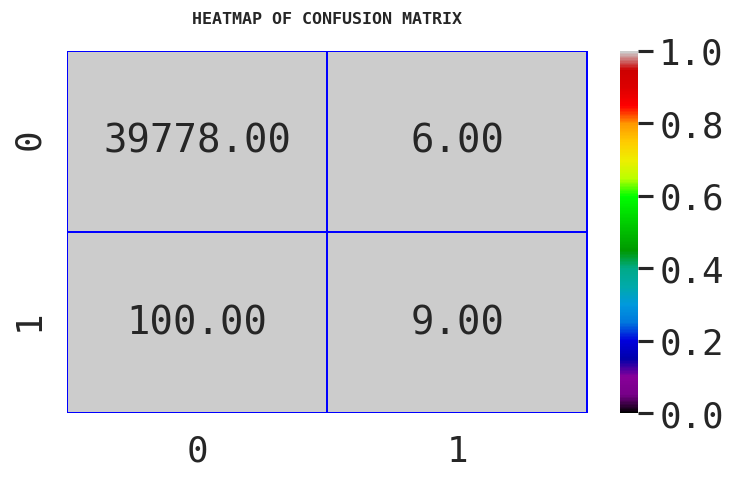



Processing abuse
-------------------------------------
ACCURACY SCORE: 0.9690421878525054

F1 score: 0.6472436446729505

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     37956
           1       0.72      0.58      0.65      1937

    accuracy                           0.97     39893
   macro avg       0.85      0.79      0.82     39893
weighted avg       0.97      0.97      0.97     39893


PRECISION:
 0.7244245524296675

RECALL:
 0.5849251419721219

MEAN SQUARED ERROR:
 0.03095781214749455

ROOT MEAN SQ. ERROR:
 0.17594832237760766

LOG_LOSS: 1.0692535902089875

AUC_ROC Score:
 0.7867849442603785

TPR: [0.         0.01135525 1.        ] 
FPR: [0.         0.58492514 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



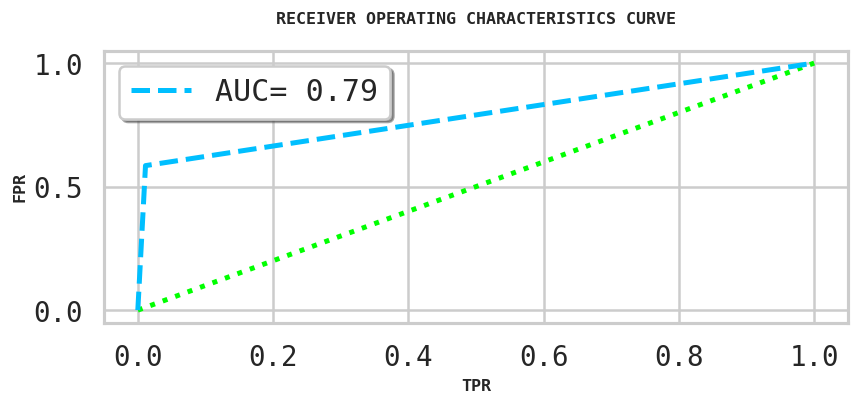





	____________________________________________CONFUSION MATRIX___________________________________________



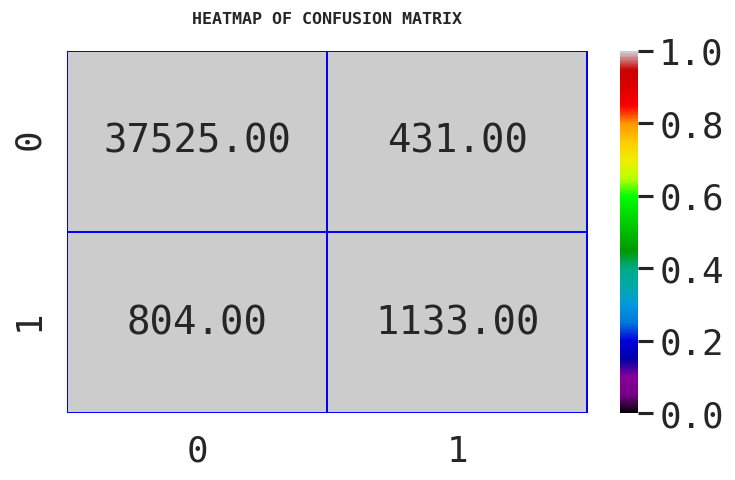



Processing loathe
-------------------------------------
ACCURACY SCORE: 0.992379615471386

F1 score: 0.23232323232323232

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     39574
           1       0.60      0.14      0.23       319

    accuracy                           0.99     39893
   macro avg       0.80      0.57      0.61     39893
weighted avg       0.99      0.99      0.99     39893


PRECISION:
 0.5974025974025974

RECALL:
 0.14420062695924765

MEAN SQUARED ERROR:
 0.007620384528614042

ROOT MEAN SQ. ERROR:
 0.0872948138700922

LOG_LOSS: 0.2631993786271582

AUC_ROC Score:
 0.5717086421802859

TPR: [0.00000000e+00 7.83342599e-04 1.00000000e+00] 
FPR: [0.         0.14420063 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



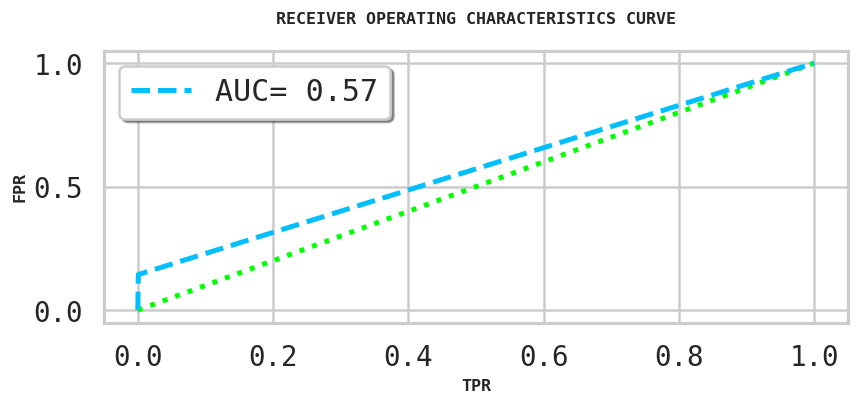





	____________________________________________CONFUSION MATRIX___________________________________________



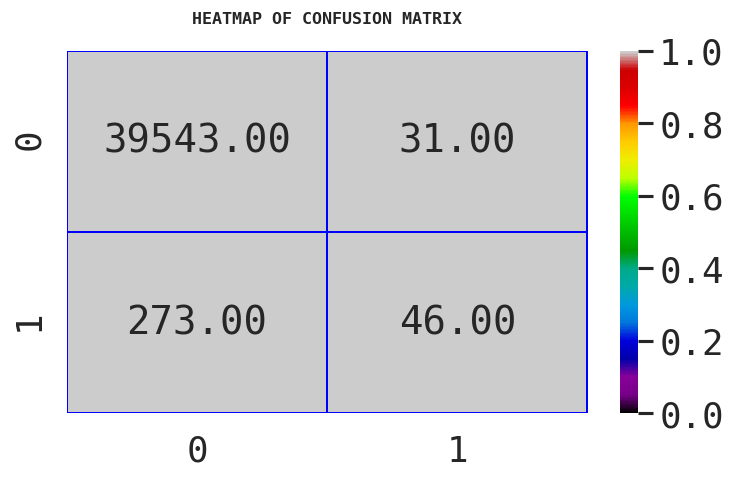



Processing normal
-------------------------------------
ACCURACY SCORE: 0.9528739377835711

F1 score: 0.9740911220749153

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.85      0.66      0.74      4067
           1       0.96      0.99      0.97     35826

    accuracy                           0.95     39893
   macro avg       0.90      0.82      0.86     39893
weighted avg       0.95      0.95      0.95     39893


PRECISION:
 0.962026350174216

RECALL:
 0.9864623457823927

MEAN SQUARED ERROR:
 0.04712606221642895

ROOT MEAN SQ. ERROR:
 0.21708538001539612

LOG_LOSS: 1.6277044860212877

AUC_ROC Score:
 0.8217288370170877

TPR: [0.         0.34300467 1.        ] 
FPR: [0.         0.98646235 1.        ]




	____________________________________________ROC_AUC CURVE_______________________________________________



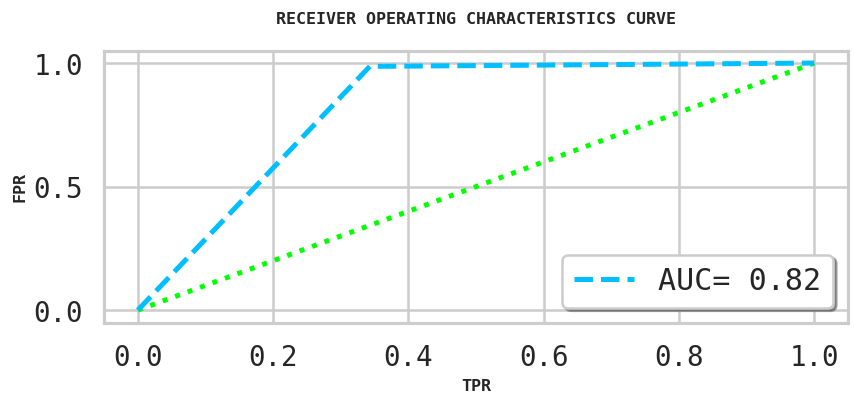





	____________________________________________CONFUSION MATRIX___________________________________________



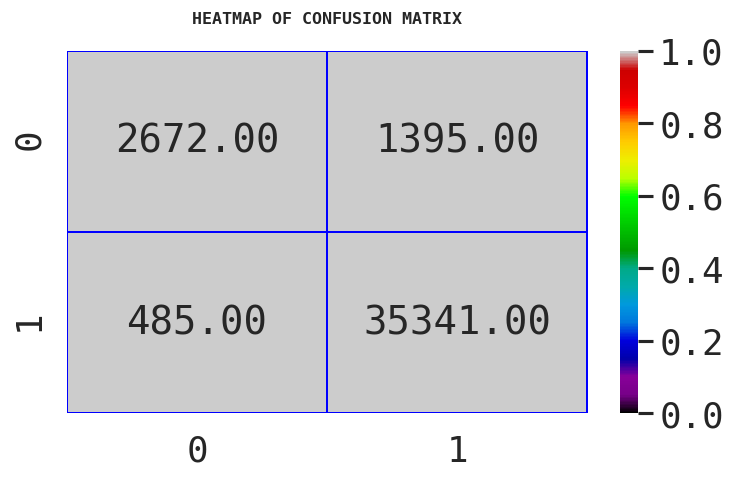

In [50]:
Rf_pipeline = Pipeline([('clf', OneVsRestClassifier(RandomForestClassifier(), n_jobs=1))])
F1=[]
ACCURACY = []
PRECESION = []
RECALL = []
RMSE = []
MSE = []
AUC=[]
TPR=[]
FPR=[]
CV_ACC=[]
LOG_LOSS=[]

for category in labels:
    print('Processing {}'.format(category))
    print('-------------------------------------')
    Rf_pipeline.fit(x_train, y_train[category])
    pred = Rf_pipeline.predict(x_test)
    f1=f1_score(pred,y_test[category])
    acc=accuracy_score(pred,y_test[category])
    clr=classification_report(y_test[category],pred)
    pre=precision_score(y_test[category],pred)
    rec=recall_score(y_test[category],pred)
    mse=mean_squared_error(y_test[category],pred)
    rmse=np.sqrt(mse)
    log = log_loss( y_test[category],pred)
    auc_scr=roc_auc_score(y_test[category],pred)
    tpr,fpr,threshold=roc_curve(y_test[category],pred)
    conf=confusion_matrix(y_test[category],pred)
        

    print('ACCURACY SCORE:', acc)
    print('\nF1 score:',f1)
    print('\nCLASSIFICATION REPORT:\n',clr)
    print('\nPRECISION:\n',pre)
    print('\nRECALL:\n',rec)
    print('\nMEAN SQUARED ERROR:\n',mse)
    print('\nROOT MEAN SQ. ERROR:\n',rmse)
    print('\nLOG_LOSS:',log)
    print('\nAUC_ROC Score:\n',auc_scr)
    print('\nTPR:',tpr,'\nFPR:',fpr)
    
    print('\n')
    #plotting the auc_roc curve
    print('\n\n\t____________________________________________ROC_AUC CURVE_______________________________________________')
    print()
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1)
    plt.figure(figsize=(8,3),dpi=120)
    plt.plot([0,1],[0,1],color='lime',linestyle=":",lw=3)
    plt.plot(tpr,fpr,label="AUC= %0.2f" % auc_scr,color='deepskyblue',lw=3,linestyle='--')
    plt.legend(fancybox=True,shadow=True, fontsize='medium')
    
    plt.xlabel("TPR",weight='bold',fontsize=10)
    plt.ylabel('FPR',weight='bold',fontsize=10)
    plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE\n',size=10,weight='bold',loc='center')
    plt.show()
    print('\n')
    #plotting confusion matrix
    print('\n\n\t____________________________________________CONFUSION MATRIX___________________________________________\n')
    sns.set(context='talk',style='whitegrid',palette='dark',font='monospace',font_scale=1.3)
    plt.figure(figsize=(7,4),dpi=120)
    sns.heatmap(conf,annot=True,fmt='.2f',vmax=1,vmin=0,cmap='nipy_spectral',linewidths=0.8, linecolor='blue')
    plt.title('HEATMAP OF CONFUSION MATRIX\n',size=10,weight='bold',loc='center')
    plt.show()
    print('\n')
    
    ACCURACY.append(acc)
    F1.append(f1)
    PRECESION.append(pre)
    RECALL.append(rec)
    RMSE.append(rmse)
    MSE.append(mse)
    AUC.append(auc_scr)
    TPR.append(tpr)
    FPR.append(fpr)
    LOG_LOSS.append(log)
    
#creating a dataframe to show the performance of the model

Rf_results = pd.DataFrame({"LABELS":labels,"F1":F1,'Acuracy':ACCURACY,'Precision': PRECESION ,'Recall': RECALL,
                               'RMSE':RMSE,'MSE':MSE,'AUC':AUC,'LOG_LOSS':LOG_LOSS})
                               
Rf_results.style.set_properties(**{'background-color':'midnightblue','color': 'lime','border-color': 'darkorange'})

In [51]:
#printing all the dataframe at one place

print('\nRESULTS OBTAINED FROM LOGISTIC REGRESSION\n')
display(logi_results)
print('\nRESULTS OBTAINED FROM KNeighborsClassifierR\n')
display(knn_results)
print('\nRESULTS OBTAINED FROM MULTINOMIAL NB\n')
display(mnb_results)
print('\nRESULTS OBTAINED FROM  BernoulliNB\n')
display(bnb_results)
print('\nRESULTS OBTAINED FROM LINER SVC\n')
display(lsvc_results)
print('\nRESULTS OBTAINED FROM RandomForestClassifier\n')
display(Rf_results)



RESULTS OBTAINED FROM LOGISTIC REGRESSION



LABELS        F1   Acuracy  Precision    Recall      RMSE  \
0         malignant  0.712950  0.954604   0.903939  0.588589  0.213064   
1  highly_malignant  0.308257  0.990550   0.613139  0.205882  0.097213   
2              rude  0.739180  0.977039   0.905160  0.624639  0.151530   
3            threat  0.227273  0.997443   0.652174  0.137615  0.050565   
4             abuse  0.621390  0.970095   0.806425  0.505421  0.172931   
5            loathe  0.256281  0.992580   0.645570  0.159875  0.086139   
6            normal  0.974509  0.953300   0.955769  0.993999  0.216102   

        MSE       AUC  LOG_LOSS  
0  0.045396  0.790982  1.567942  
1  0.009450  0.602270  0.326402  
2  0.022961  0.810521  0.793062  
3  0.002557  0.568707  0.088310  
4  0.029905  0.749615  1.032887  
5  0.007420  0.579584  0.256273  
6  0.046700  0.794393  1.612991


RESULTS OBTAINED FROM KNeighborsClassifierR



LABELS        F1   Acuracy  Precision    Recall      RMSE  \
0         malignant  0.712950  0.954604   0.903939  0.588589  0.213064   
1  highly_malignant  0.308257  0.990550   0.613139  0.205882  0.097213   
2              rude  0.739898  0.977089   0.905292  0.625602  0.151365   
3            threat  0.227273  0.997443   0.652174  0.137615  0.050565   
4             abuse  0.621390  0.970095   0.806425  0.505421  0.172931   
5            loathe  0.256281  0.992580   0.645570  0.159875  0.086139   
6            normal  0.974509  0.953300   0.955769  0.993999  0.216102   

        MSE       AUC  LOG_LOSS  
0  0.045396  0.790982  1.567942  
1  0.009450  0.602270  0.326402  
2  0.022911  0.811003  0.791331  
3  0.002557  0.568707  0.088310  
4  0.029905  0.749615  1.032887  
5  0.007420  0.579584  0.256273  
6  0.046700  0.794393  1.612991


RESULTS OBTAINED FROM MULTINOMIAL NB



LABELS        F1   Acuracy  Precision    Recall      RMSE  \
0         malignant  0.653659  0.948387   0.914783  0.508506  0.227185   
1  highly_malignant  0.321608  0.989848   0.507937  0.235294  0.100758   
2              rude  0.666867  0.972151   0.884646  0.535130  0.166882   
3            threat  0.010582  0.995312   0.012500  0.009174  0.068466   
4             abuse  0.584776  0.968140   0.796263  0.462055  0.178494   
5            loathe  0.101523  0.991126   0.266667  0.062696  0.094201   
6            normal  0.970763  0.946156   0.947346  0.995366  0.232043   

        MSE       AUC  LOG_LOSS  
0  0.051613  0.751744  1.782656  
1  0.010152  0.616469  0.350645  
2  0.027849  0.765648  0.961890  
3  0.004688  0.503594  0.161903  
4  0.031860  0.728011  1.100418  
5  0.008874  0.530653  0.306489  
6  0.053844  0.754015  1.859747


RESULTS OBTAINED FROM  BernoulliNB



LABELS        F1   Acuracy  Precision    Recall      RMSE  \
0         malignant  0.323944  0.645627   0.198186  0.886417  0.595292   
1  highly_malignant  0.094506  0.816985   0.049771  0.933824  0.427802   
2              rude  0.227987  0.678465   0.130288  0.911453  0.567041   
3            threat  0.154532  0.985737   0.092199  0.477064  0.119428   
4             abuse  0.215383  0.682400   0.122370  0.897780  0.563560   
5            loathe  0.097098  0.871331   0.051435  0.865204  0.358705   
6            normal  0.755706  0.642870   0.979683  0.615084  0.597604   

        MSE       AUC   LOG_LOSS  
0  0.354373  0.753269  12.239883  
1  0.183015  0.874801   6.321245  
2  0.321535  0.788558  11.105683  
3  0.014263  0.732097   0.492642  
4  0.317600  0.784595  10.969751  
5  0.128669  0.868292   4.444178  
6  0.357130  0.751358  12.334854


RESULTS OBTAINED FROM LINER SVC



LABELS        F1   Acuracy  Precision    Recall      RMSE  \
0         malignant  0.734335  0.956108   0.873646  0.633342  0.209505   
1  highly_malignant  0.295327  0.990550   0.622047  0.193627  0.097213   
2              rude  0.771491  0.978944   0.887359  0.682387  0.145108   
3            threat  0.366013  0.997568   0.636364  0.256881  0.049310   
4             abuse  0.645200  0.970722   0.783764  0.548271  0.171109   
5            loathe  0.304450  0.992555   0.601852  0.203762  0.086284   
6            normal  0.975819  0.955907   0.961400  0.990677  0.209983   

        MSE       AUC  LOG_LOSS  
0  0.043892  0.811820  1.515997  
1  0.009450  0.596206  0.326402  
2  0.021056  0.838813  0.727263  
3  0.002432  0.628239  0.083982  
4  0.029278  0.770276  1.011243  
5  0.007445  0.601338  0.257139  
6  0.044093  0.820148  1.522945


RESULTS OBTAINED FROM RandomForestClassifier



LABELS        F1   Acuracy  Precision    Recall      RMSE  \
0         malignant  0.726736  0.953551   0.832432  0.644857  0.215521   
1  highly_malignant  0.172131  0.989873   0.525000  0.102941  0.100633   
2              rude  0.787080  0.979345   0.849888  0.732916  0.143719   
3            threat  0.145161  0.997343   0.600000  0.082569  0.051547   
4             abuse  0.647244  0.969042   0.724425  0.584925  0.175948   
5            loathe  0.232323  0.992380   0.597403  0.144201  0.087295   
6            normal  0.974091  0.952874   0.962026  0.986462  0.217085   

        MSE       AUC  LOG_LOSS  
0  0.046449  0.815554  1.604310  
1  0.010127  0.550989  0.349778  
2  0.020655  0.862901  0.713413  
3  0.002657  0.541209  0.091773  
4  0.030958  0.786785  1.069254  
5  0.007620  0.571709  0.263199  
6  0.047126  0.821729  1.627704

In [139]:
#Applying lemmatization to convert text in to words
lem=WordNetLemmatizer()
test_data['comment_text'] = test_data['comment_text'].apply(lambda x: ' '.join(
lem.lemmatize(t) for t in x.split()))

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 5000, stop_words='english')
test_data1 =tf_vec.fit_transform(test_data['comment_text'])
test_data1

<153164x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 2668361 stored elements in Compressed Sparse Row format>

In [141]:
#predicting the labels
prediction=lvsc_pipeline.predict(test_data1)
test_data['Predicted values']=Prediction
test_data

comment_text  Predicted values
0       Yo bitch Ja Rule is more succesful then you'll...                 0
1          == From RfC == The title is fine a it is, IMO.                 1
2          " == Sources == * Zawe Ashton on Lapland — / "                 1
3       :If you have a look back at the source, the in...                 1
4                I don't anonymously edit article at all.                 1
...                                                   ...               ...
153159  . i totally agree, this stuff is nothing but t...                 1
153160  == Throw from out field to home plate. == Does...                 1
153161  " == Okinotorishima category == I see your cha...                 1
153162  " == ""One of the founding nation of the EU - ...                 1
153163  " :::Stop already. Your bullshit is not welcom...                 1

[153164 rows x 2 columns]

In [142]:
# creating csv file
test_data.to_csv('Malignant_Comment_Classifier_Predict.csv')

### Saving the model

In [144]:
import pickle
filename = 'comment_prediction.pkl'
pickle.dump(lvsc_pipeline,open(filename,'wb'))